# Study Point
- matplot의 line그래프를 대상으로 챠트의 각 요소를 익힌다
- bar, pie, histogram, scatter 그래프를 그려본다
- subplot을 이용해서 여러 개의 그래프를 한장에 그려본다
- pandas 패키지의 DataFrame을 그래프로 그려본다
- seaborn패키지를 이용해서 좀 더 다양한 그래프를 그려본다
- 지도정보를 이용해서 지도에 시각화를 해 본다

참고자료 : http://pandas.pydata.org/pandas-docs/stable/visualization.html

# <font color='green'>요 약</font>
본 연구의 결과로 통합식품안전정보망의 정보 및 외부 기후정보를 활용하여 업소의 기본정보, 과거 행정처분자료를 바탕으로 <font color='red'>단속 필요성 점수를 산출하여 부적합업소를 적발하는 확률을 제공</font>하였다.  <font color='red'>부적합업소를 적발하는 확률이란 업소의 특성(영업일수, 종업원 수, HACCP, 면적, 과거 5년간 부적합률, 위생점검 당시의 평균기온과 습도 등)을 통해 해당 업체에 단속 나갔을 경우 ‘부적합’이라고 예측할 확률이다.</font>

In [1]:
import os
#os.chdir('D:/축산물과제/2차 축산물/script')

#from livestock import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# ppt이미지 파일 불러오기
from IPython.display import Image
width = 700
height = 300

import os
import pandas as pd
import time
from datetime import datetime
import folium


%matplotlib inline
import matplotlib.pylab as plt
import matplotlib
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

# Basic
import numpy as np
from IPython.display import display
pd.options.display.max_columns = None
import seaborn as sns
import pickle
import os
import math 


#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic'
import missingno as msno

## pandas plot - box - groupby

In [2]:
plt.rcParams["figure.figsize"] = (15,3)

np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50,2))
df_box['g'] = np.random.choice(['A', 'B'], size =50)

In [3]:
df_box.head()

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,0.887163,B
3,0.859588,-0.636524,A
4,0.015696,-2.242685,B


In [4]:
df_box.loc
df_box.loc[:, 1].head()
df_box.loc[df_box['g'] == 'B', 1].head()

0   -1.190976
1   -0.312652
2    0.887163
3   -0.636524
4   -2.242685
Name: 1, dtype: float64

2     0.887163
4    -2.242685
10   -0.655969
11    0.553439
12   -0.469305
Name: 1, dtype: float64

In [5]:
df_box.loc[df_box['g'] == 'B', 1] += 3

In [6]:
df_box.head()

,0,1,g
0,0.471435,-1.190976,A
1,1.432707,-0.312652,A
2,-0.720589,3.887163,B
3,0.859588,-0.636524,A
4,0.015696,0.757315,B


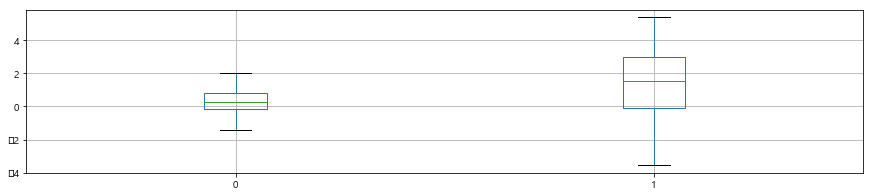

In [7]:
bp = df_box.boxplot()

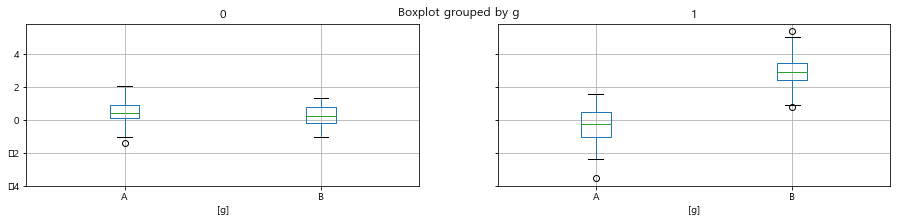

In [8]:
bp = df_box.boxplot(by='g')

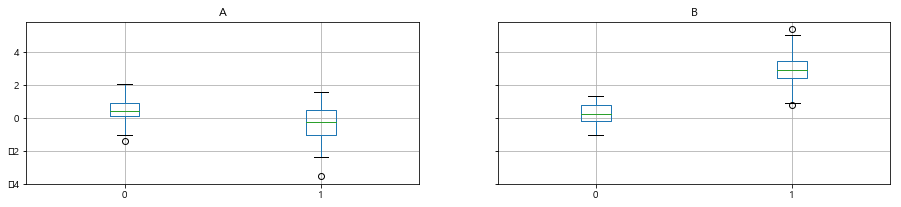

In [9]:
bp = df_box.groupby('g').boxplot()

In [10]:
df_box.loc[df_box['g'] == 'B', 1]

2     3.887163
4     0.757315
10    2.344031
11    3.553439
12    2.530695
13    1.182973
14    4.058969
16    4.045938
17    2.877908
18    2.677205
19    5.390961
21    0.925022
22    2.102843
23    3.018289
24    3.215269
25    1.554190
27    2.855380
28    2.964487
30    2.929655
35    3.462060
36    3.523508
37    5.007843
38    1.847341
39    3.039513
41    3.152631
45    2.600035
46    2.415282
47    2.918053
Name: 1, dtype: float64

## pandas plot - Area Plot

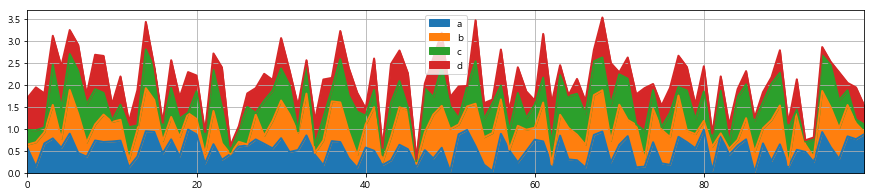

In [11]:
df =pd.DataFrame(np.random.rand(100,4), columns=['a', 'b', 'c', 'd'])
df.plot.area()

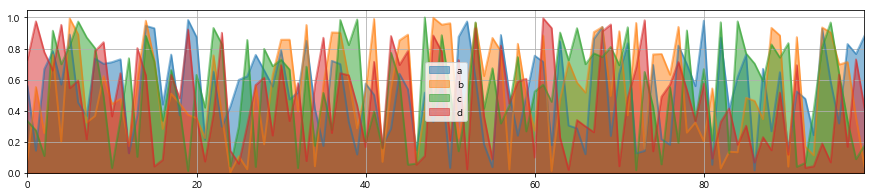

In [12]:
df.plot.area(stacked=False)

## pandas plot - scatter

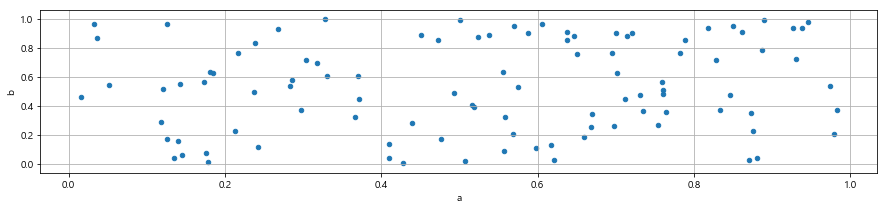

In [13]:
df.plot.scatter(x='a', y='b')

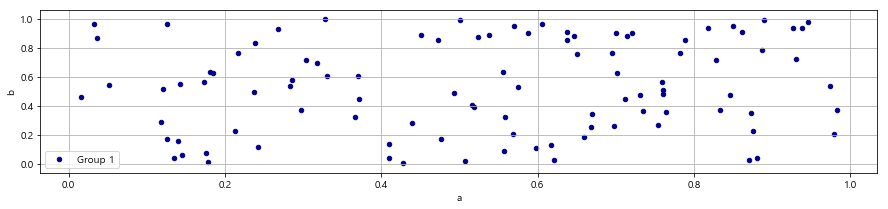

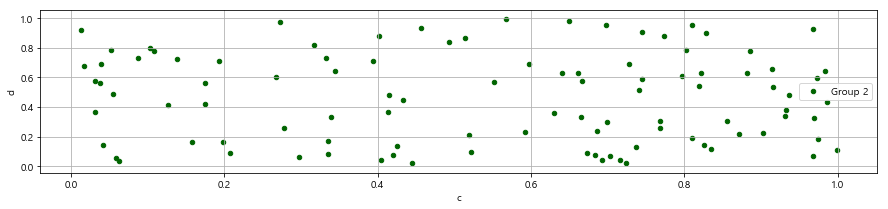

In [14]:
df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2')

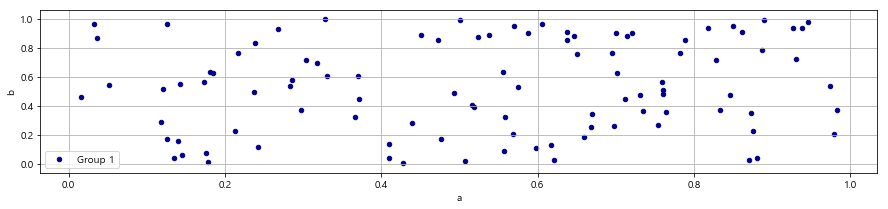

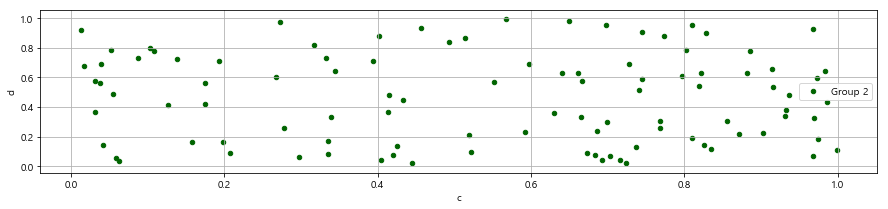

In [15]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2')

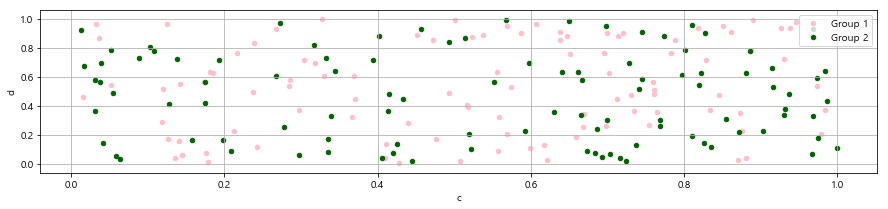

In [16]:
ax = df.plot.scatter(x='a', y='b', color='Pink', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

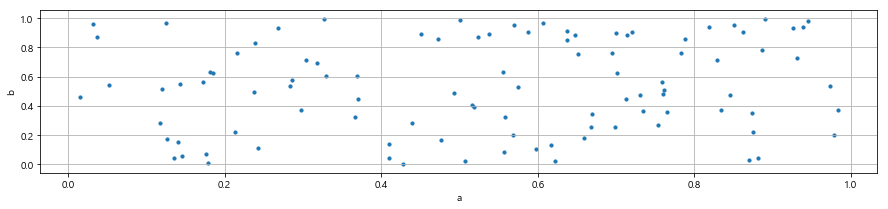

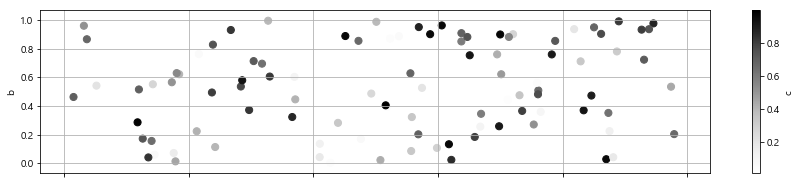

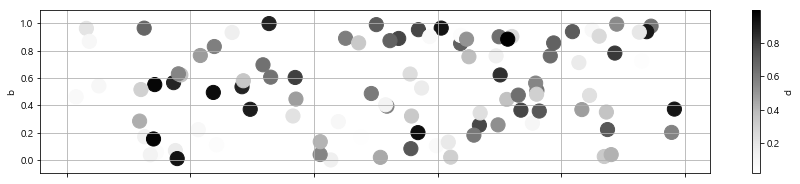

In [17]:
df.plot.scatter(x='a', y='b', s=10)
df.plot.scatter(x='a', y='b', c='c', s=50) # c는 색상을 지정
df.plot.scatter(x='a', y='b', c='d', s=200)

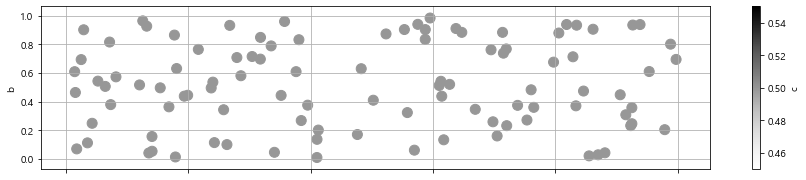

In [80]:
df.plot.scatter(x='a', y='b', c='c', s=df['c']*200)

## pandas plot - Hexagonal Bin Plot

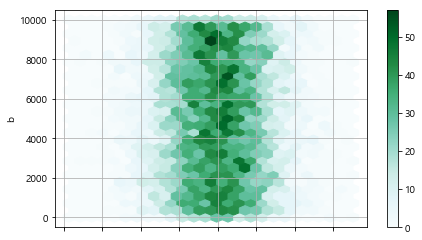

In [50]:
plt.rcParams["figure.figsize"] = (7,4)
N = 10000
df =pd.DataFrame(np.random.randn(N,2), columns=['a', 'b'])
df['b'] =df['b'] + np.arange(N)
df.plot.hexbin(x='a', y='b', gridsize =25)

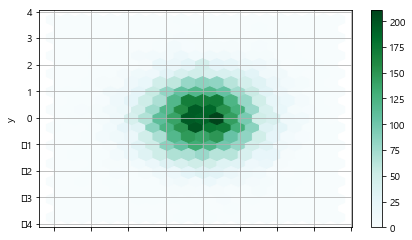

In [51]:
n = 10000
df = pd.DataFrame({'x': np.random.randn(n),'y': np.random.randn(n)})
ax= df.plot.hexbin(x='x', y='y', gridsize=20)

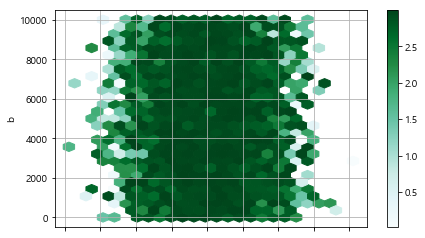

In [52]:
plt.rcParams["figure.figsize"] = (7,4)
N = 10000
df =pd.DataFrame(np.random.randn(N,2), columns=['a', 'b'])
df['b'] =df['b'] = df['b'] + np.arange(N)
df['z'] = np.random.uniform(0,3,N)
df.plot.hexbin(x='a', y='b',C='z', reduce_C_function=np.max, gridsize =25)

## pandas plot - Pie plot

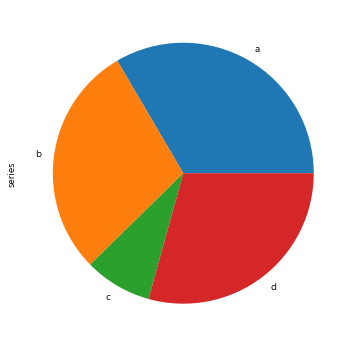

In [53]:
series = pd.Series(3*np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot.pie(figsize=(6,6))

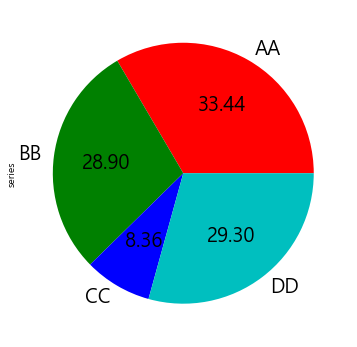

In [59]:
series.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
                autopct='%.2f', fontsize=20, figsize=(6,6))

In [63]:
[0,1]*4

[0, 1, 0, 1, 0, 1, 0, 1]

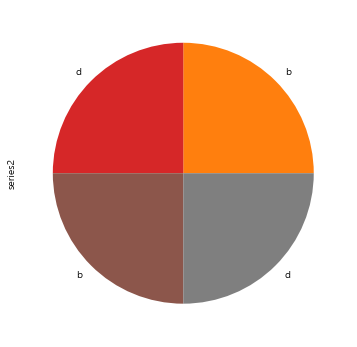

In [67]:
series= pd.Series([0,1]*4, index=['a', 'b', 'c', 'd']*2, name='series2')
ax = series.plot.pie(figsize=(6,6))

,x,y
a,1.062903,2.950517
b,0.874359,2.044615
c,1.849951,0.421194
d,0.841242,0.753805


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC9CE7D2B0>,
      dtype=object)

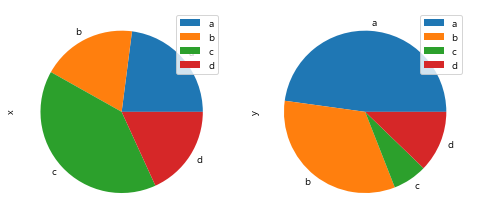

In [58]:
df = pd.DataFrame(3*np.random.rand(4,2), index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df
df.plot.pie(subplots=True, figsize=(8,4))

## pandas plot - subplot

,A,B,C,D
0,-1.008145,0.868926,0.591460,1.107189
1,1.493447,-0.264483,-0.504497,-0.520135
2,1.264228,-0.925722,-1.328964,-0.401030


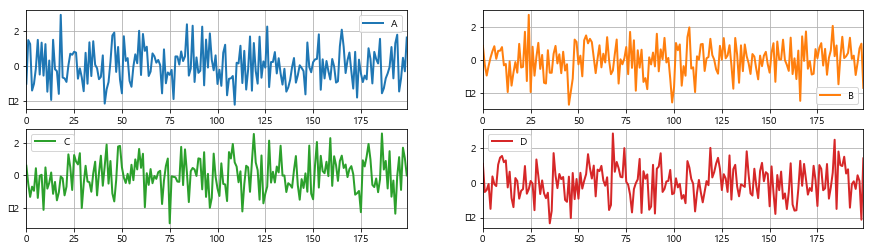

In [85]:
df =pd.DataFrame(np.random.randn(200, 4), columns=list('ABCD'))
df.head(3)
ax= df.plot(subplots=True, layout=(2,-1), figsize=(15,4), sharex=False)

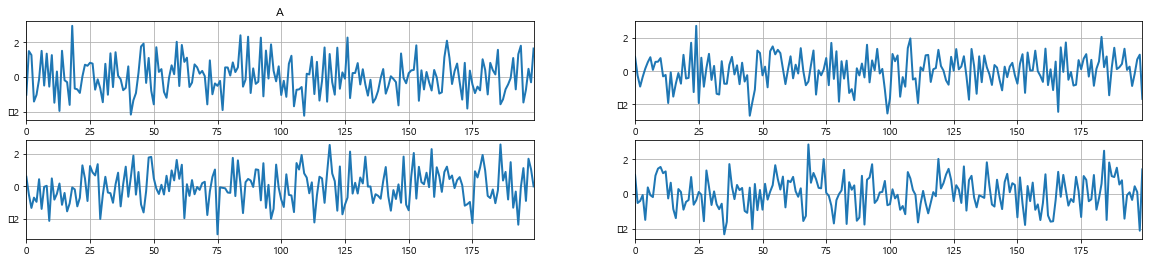

In [89]:
plt.rcParams["figure.figsize"] = (20,4)
fig, axes = plt.subplots(nrows=2, ncols=2)
df['A'].plot(ax=axes[0,0]); axes[0,0].set_title('A');
df['B'].plot(ax=axes[0,1]); axes[0,0].set_title('A');
df['C'].plot(ax=axes[1,0]); axes[0,0].set_title('A');
df['D'].plot(ax=axes[1,1]); axes[0,0].set_title('A');

# Seaborn - Scatter

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

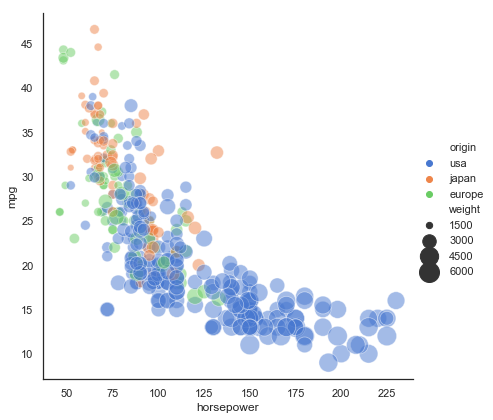

In [97]:
import seaborn as sns
sns.set(style='white')
mpg=sns.load_dataset('mpg')
mpg.columns
sns.relplot(x='horsepower', y='mpg', hue='origin', size ='weight',
          sizes=(40,400), alpha=0.5, palette='muted', height=6, data=mpg)

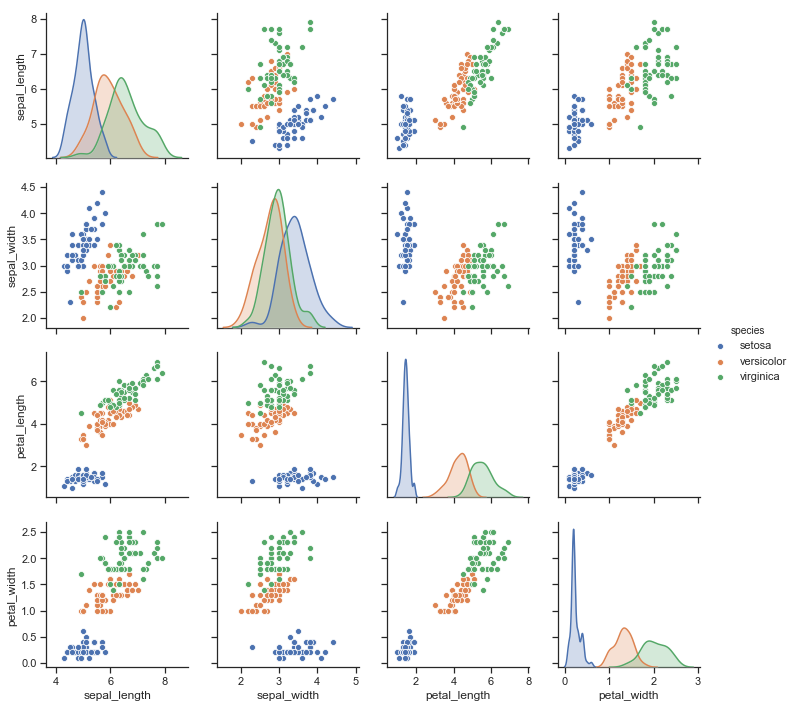

In [98]:
sns.set(style='ticks')
df = sns.load_dataset('iris')
sns.pairplot(df, hue='species')

array([[0.53481588, 0.77724261, 0.36459255, 0.19773972, 0.46998315],
       [0.80442447, 0.1913777 , 0.72674465, 0.84746839, 0.51569312],
       [0.38182856, 0.9346016 , 0.11475623, 0.06978627, 0.00575926],
       [0.92173081, 0.94773873, 0.07948408, 0.64696254, 0.19315067],
       [0.57682005, 0.6144004 , 0.8652893 , 0.18311719, 0.07462598]])

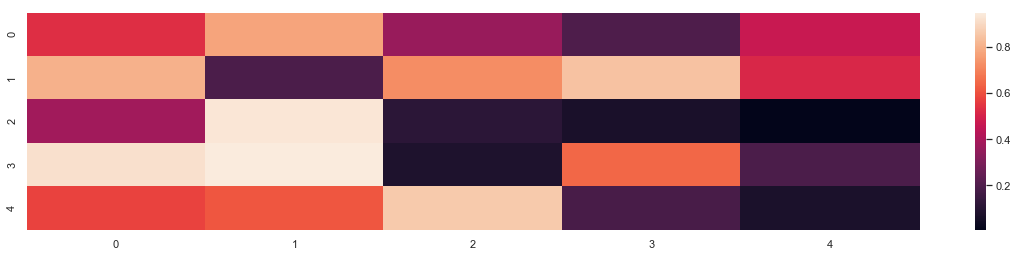

In [114]:
uniform_data = np.random.rand(5, 5)
uniform_data
ax = sns.heatmap(uniform_data)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419


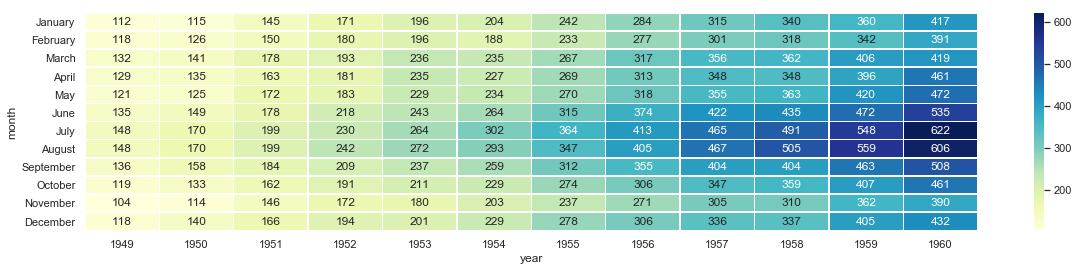

In [119]:
sns.set()
flights = sns.load_dataset('flights')
flights =flights.pivot('month', 'year', 'passengers')
flights.head(3)
f, a = plt.subplots()
sns.heatmap(flights, annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")

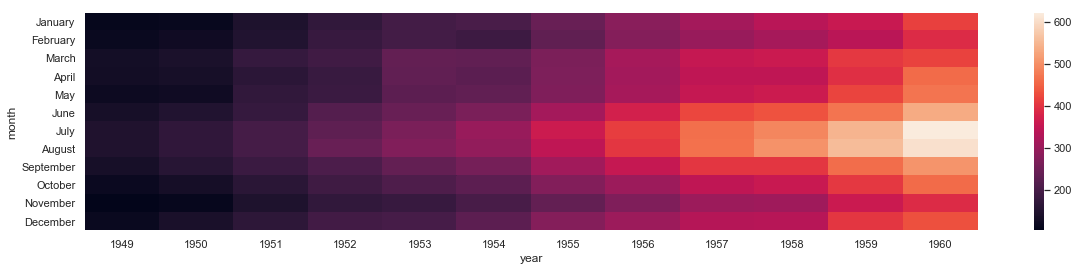

In [107]:
flights =flights.pivot('month', 'year', 'passengers')

f, a = plt.subplots()
sns.heatmap(flights)

# Seaborn - 선형관계 - multiple linear regression

In [121]:
iris = sns.load_dataset('iris')
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

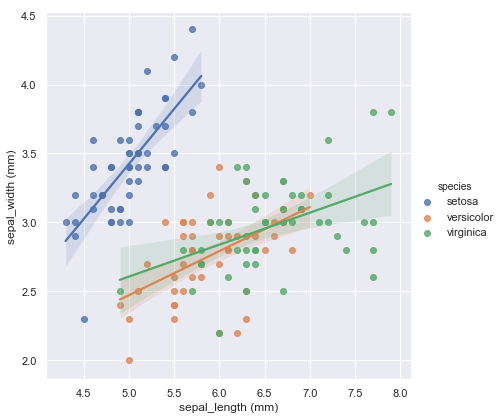

In [126]:
g = sns.lmplot(x='sepal_length', y='sepal_width', hue='species', truncate=True,
            height=6, data=iris)
g.set_axis_labels('sepal_length (mm)', 'sepal_width (mm)')

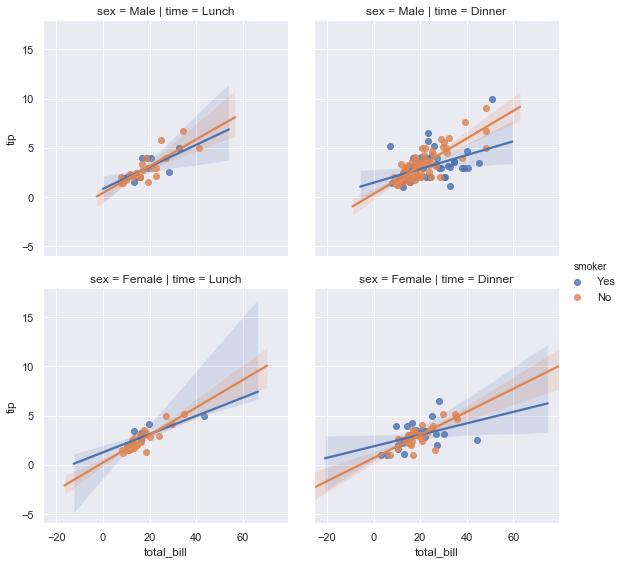

In [132]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', 
           col='time', row='sex', height = 4, data=sns.load_dataset('tips'))

# Seaborn - 분류형 변수(category)

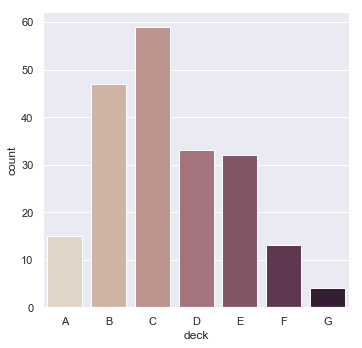

In [134]:
sns.catplot(x='deck', kind='count', palette='ch:.25', data=sns.load_dataset('titanic'))

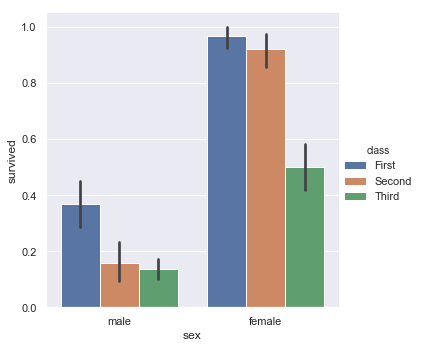

In [136]:
sns.catplot(x='sex', y='survived', hue='class', kind='bar', data=sns.load_dataset('titanic'))

# Seaborn - 분류형 변수(category) - Point plots

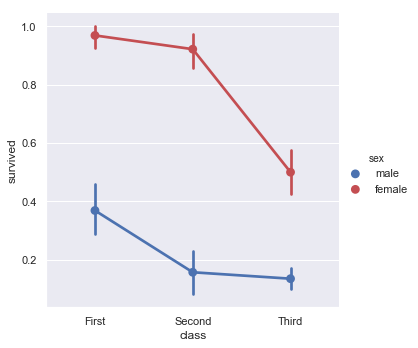

In [140]:
sns.catplot(x='class', y='survived', hue='sex',
            palette={'male':'b', 'female':'r'},
            kind='point', data=sns.load_dataset('titanic'))

# Seaborn - 분류형 변수(category) - scatter plots

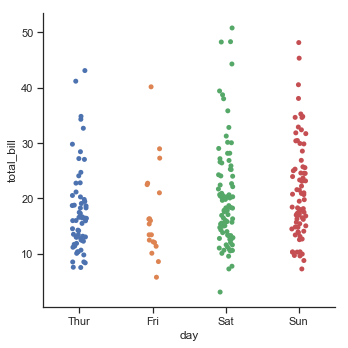

In [141]:
sns.set(style='ticks', color_codes=True)
sns.catplot(x='day', y='total_bill', data=sns.load_dataset('tips'))

# Seaborn - 분류형 변수(category) - scatter plots

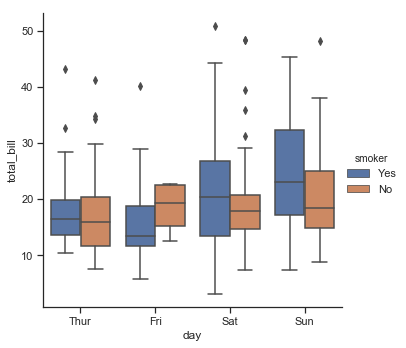

In [142]:
sns.catplot(x='day', y='total_bill', hue='smoker', kind='box', data=sns.load_dataset('tips'))

# Seaborn - 분류형 변수(category) - violin

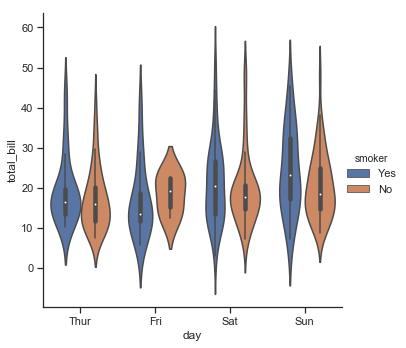

In [143]:
sns.set(style='ticks', color_codes=True)
sns.catplot(x='day', y='total_bill', hue='smoker', kind='violin', data=sns.load_dataset('tips'))

## seaborn - 분포

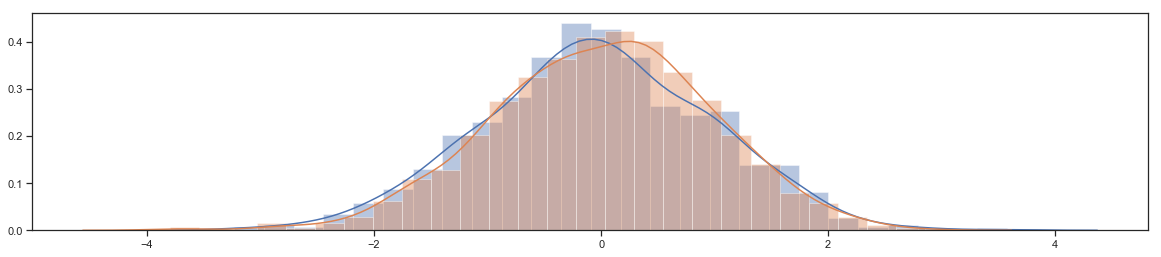

In [158]:
from scipy import stats

np.random.seed(123)

x1= np.random.randn(1000)
x2= np.random.normal(size = 1000)
sns.distplot(x1)
sns.distplot(x2)

## seaborn - 분포 - Scatterplots

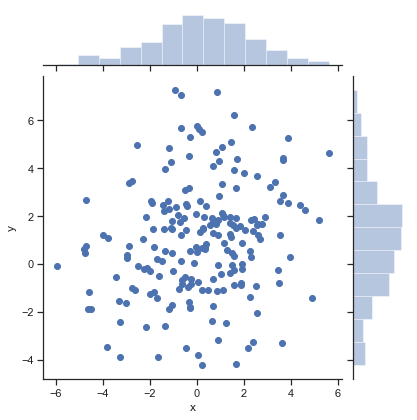

In [163]:
mean, cov =[0,1], [(1,5), (5,1)]
data =np.random.multivariate_normal(mean, cov, 200)
df =pd.DataFrame(data, columns=['x', 'y'])

sns.jointplot(x='x', y='y', data=df)

## seaborn - 분포 - Hexbin plot

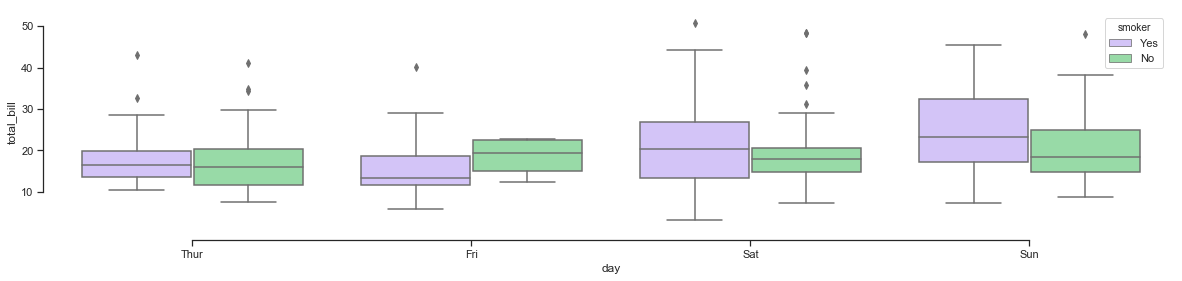

In [168]:
sns.set(style='ticks', palette='pastel')
sns.boxplot(x='day', y='total_bill', hue='smoker', palette=['m', 'g'], data=sns.load_dataset('tips'))
sns.despine(offset=10, trim=True)

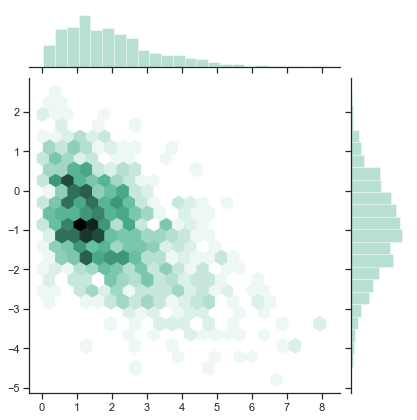

In [176]:
rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

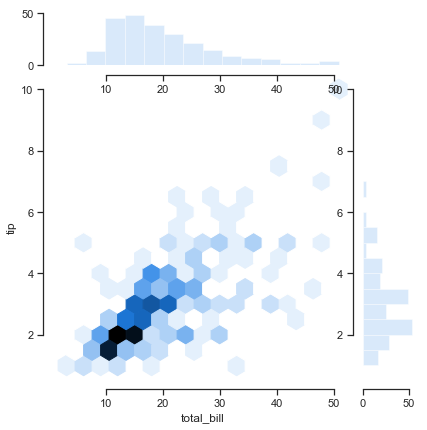

In [189]:
sns.jointplot(x='total_bill', y='tip', kind = 'hex',data=tips)
sns.despine(offset=10, trim=True)

## seaborn - 분포 - Linear regression

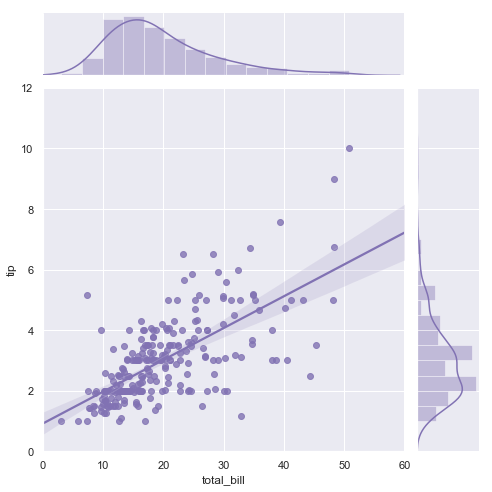

In [194]:
sns.set(style='darkgrid')

sns.jointplot(x='total_bill', y='tip', kind = 'reg',
              xlim=(0,60), ylim=(0,12), color='m', height =7,
              data=tips)

## End

폐업일자와 허가일자를 datatime형태로 전환
-  폐업일자 최대일자를 2020.12.31로 하여야 2019년도 통계 취합 가능

# 1. 인허가/폐업 업체 현황

In [17]:
BSN=BSN.assign(허가년도=BSN['허가_일자']//10000,
               허가월=BSN['허가_일자']% 10000 //100,
               허가일=BSN['허가_일자']% 100 ,
               폐업년도=BSN['폐업_일자']//10000,
               폐업월=BSN['폐업_일자']% 10000 //100,
               폐업일=BSN['폐업_일자']% 100
              )
BSN.head(10)
BSN.columns
BSN.shape
BSN.nunique()

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,허가년도,허가월,허가일,폐업년도,폐업월,폐업일
0,2007001004223363,경상남도,NaN,NaN,20070528,20100415,632,소비,2007,5,28,2010,4,15
1,2010001004248896,경기도,NaN,NaN,20100216,20130628,632,소비,2010,2,16,2013,6,28
2,1998001004358539,전라남도,126.395260,34.795768,19980805,20180829,632,소비,1998,8,5,2018,8,29
3,2016001000070198,경기도,127.100901,37.255922,20160216,20180504,632,소비,2016,2,16,2018,5,4
4,1991001004335127,서울특별시,127.032842,37.550216,19910712,20201231,632,소비,1991,7,12,2020,12,31
5,2012001004311193,서울특별시,127.098367,37.487791,20121203,20180227,632,소비,2012,12,3,2018,2,27
6,2004001004280023,경상북도,128.395483,35.986608,20040430,20190115,632,소비,2004,4,30,2019,1,15
7,2006001004249995,경기도,NaN,NaN,20061115,20091231,632,소비,2006,11,15,2009,12,31
8,2006001004256502,경기도,NaN,NaN,20060330,20080125,632,소비,2006,3,30,2008,1,25
9,2004001004307975,부산광역시,NaN,NaN,20040112,20050513,632,소비,2004,1,12,2005,5,13


Index(['영업_인허가_대장_번호', '영업소재지', '위도', '경도', '허가_일자', '폐업_일자', '업종코드', '단계',
       '허가년도', '허가월', '허가일', '폐업년도', '폐업월', '폐업일'],
      dtype='object')

(212829, 14)

영업_인허가_대장_번호    212829
영업소재지               17
위도               87689
경도               87680
허가_일자            12778
폐업_일자             7086
업종코드                15
단계                   4
허가년도                73
허가월                 12
허가일                 31
폐업년도                39
폐업월                 12
폐업일                 31
dtype: int64

In [18]:
Notnull_null_unique(BSN)

--- 2.2861135005950928 seconds of running time---


,Feature_Name,Notnull,Null,Unique
0,영업_인허가_대장_번호,212829,0,212829
4,허가_일자,212829,0,12778
5,폐업_일자,212829,0,7086
6,업종코드,212829,0,15
7,단계,212829,0,4
8,허가년도,212829,0,73
9,허가월,212829,0,12
10,허가일,212829,0,31
11,폐업년도,212829,0,39
12,폐업월,212829,0,12


### convert datatime to integer (vice verse) with 인허가 폐업일자
- BSN['허가_일자'] = BSN['허가_일자'].dt.strftime('%Y%m%d'): convert datetime to object
- BSN['허가_일자'] = BSN['허가_일자'].astype('int64') : convert object to integer
- BSN['허가_일자'] = pd.to_datetime(BSN['허가_일자']): convert object to datetime
- BSN = BSN.dropna(subset=[ '허가일자', '폐업일자']) 특정 열에 nan이 있을 경우 row를 삭제

## 1.1 년도별 인허가 및 폐업 현황
허가년도가 2020 이 넘어가고 폐업년도가 2020년도가 아주 많다.

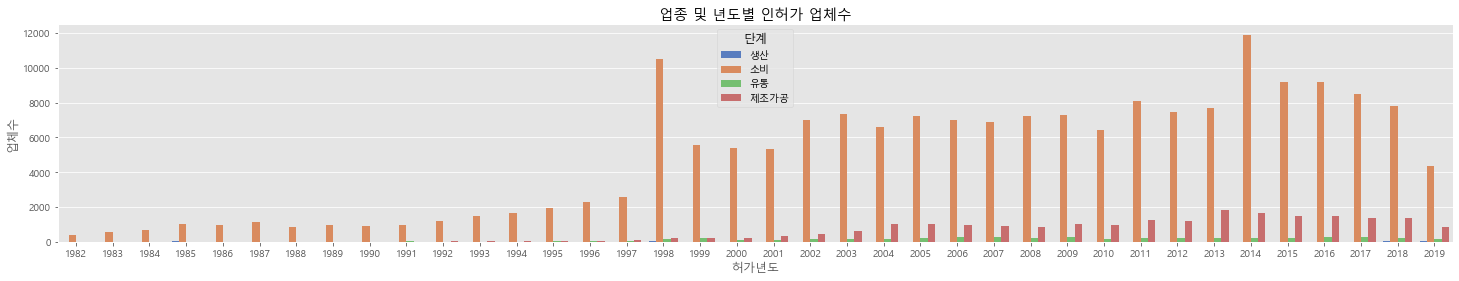

In [24]:
import matplotlib
data = BSN[~((BSN.허가년도 == 9920) | (BSN.허가년도 <= 1981) | (BSN.허가년도 >= 2020))].groupby(['허가년도', '단계']).size().reset_index(name='업체수')
#data.업체수 = np.log(data.업체수)
from matplotlib import rcParams
rcParams['figure.figsize'] = 25, 4
#fig, ax = pyplot.subplots(figsize=(25, 4))
ax = sns.barplot(x='허가년도', y='업체수', hue= '단계', data=data, palette="muted").set_title("업종 및 년도별 인허가 업체수")

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
허가년도    150 non-null int64
단계      150 non-null object
업체수     150 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.6+ KB


#### 최근 3년간 인허가 업체 수 및 평균업체 수

In [26]:
data[(data.허가년도 == 2016) | (data.허가년도 == 2017) | (data.허가년도 == 2018)].groupby('허가년도').업체수.sum()
data[(data.허가년도 == 2016) | (data.허가년도 == 2017) | (data.허가년도 == 2018)].groupby('허가년도').업체수.sum().mean()

허가년도
2016    10940
2017    10128
2018     9448
Name: 업체수, dtype: int64

10172.0

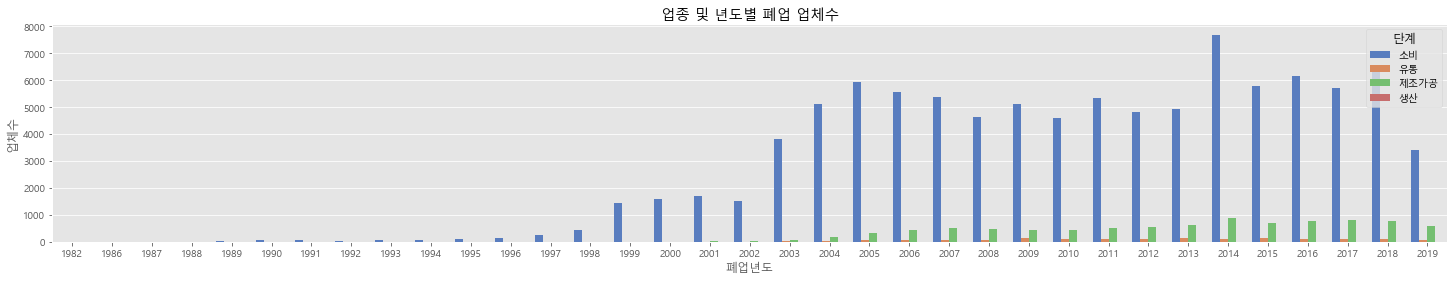

In [27]:
data = BSN[(BSN.폐업년도 < 2020)].groupby(('폐업년도', '단계')).size().reset_index(name='업체수')
#data.업체수 = np.log(data.업체수)
from matplotlib import rcParams
rcParams['figure.figsize'] = 25, 4
#fig, ax = pyplot.subplots(figsize=(25, 4))
ax = sns.barplot(x='폐업년도', y='업체수', hue= '단계', data=data, palette="muted").set_title("업종 및 년도별 폐업 업체수")

#### 최근 3년간 폐업 업체 수 및 평균업체 수

In [28]:
data[(data.폐업년도 == 2016) | (data.폐업년도 == 2017) | (data.폐업년도 == 2018)].groupby('폐업년도').업체수.sum()
data[(data.폐업년도 == 2016) | (data.폐업년도 == 2017) | (data.폐업년도 == 2018)].groupby('폐업년도').업체수.sum().mean()

폐업년도
2016    7042
2017    6645
2018    7299
Name: 업체수, dtype: int64

6995.333333333333

## 1.2 지역별 인허가 및 폐업 현황
### 기준년도(base_year)에 영업중인 업체 현황

In [29]:
BSN.head(3)
BSN.groupby('허가월')['허가일'].max(), BSN.groupby('폐업월')['폐업일'].max()

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,허가년도,허가월,허가일,폐업년도,폐업월,폐업일
0,2007001004223363,경상남도,NaN,NaN,20070528,20100415,632,소비,2007,5,28,2010,4,15
1,2010001004248896,경기도,NaN,NaN,20100216,20130628,632,소비,2010,2,16,2013,6,28
2,1998001004358539,전라남도,126.39526,34.795768,19980805,20180829,632,소비,1998,8,5,2018,8,29


(허가월
 1     31
 2     30
 3     31
 4     30
 5     31
 6     30
 7     31
 8     31
 9     31
 10    31
 11    30
 12    31
 Name: 허가일, dtype: int64, 폐업월
 1     31
 2     30
 3     31
 4     30
 5     31
 6     31
 7     31
 8     31
 9     30
 10    31
 11    30
 12    31
 Name: 폐업일, dtype: int64)

### 월별 최대 일자가 넘어가는 것을 확인하고 정정

In [30]:
def rule(x, y):
    if x == 2 and y >= 29:
        return y-2
    elif (x == 6 or x == 9) and y >= 31:
        return y-2
    else:
        return y

BSN['허가일'] = BSN.apply(lambda x: rule(x['허가월'], x['허가일']), axis = 1)
BSN['폐업일'] = BSN.apply(lambda x: rule(x['폐업월'], x['폐업일']), axis = 1)

In [31]:
BSN.head(5)
BSN.info()
BSN.groupby('허가월')['허가일'].max(), BSN.groupby('폐업월')['폐업일'].max()

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,허가년도,허가월,허가일,폐업년도,폐업월,폐업일
0,2007001004223363,경상남도,NaN,NaN,20070528,20100415,632,소비,2007,5,28,2010,4,15
1,2010001004248896,경기도,NaN,NaN,20100216,20130628,632,소비,2010,2,16,2013,6,28
2,1998001004358539,전라남도,126.395260,34.795768,19980805,20180829,632,소비,1998,8,5,2018,8,29
3,2016001000070198,경기도,127.100901,37.255922,20160216,20180504,632,소비,2016,2,16,2018,5,4
4,1991001004335127,서울특별시,127.032842,37.550216,19910712,20201231,632,소비,1991,7,12,2020,12,31


<class 'pandas.core.frame.DataFrame'>
Int64Index: 212829 entries, 0 to 212828
Data columns (total 14 columns):
영업_인허가_대장_번호    212829 non-null int64
영업소재지           210793 non-null object
위도              120774 non-null float64
경도              120774 non-null float64
허가_일자           212829 non-null int64
폐업_일자           212829 non-null int64
업종코드            212829 non-null object
단계              212829 non-null object
허가년도            212829 non-null int64
허가월             212829 non-null int64
허가일             212829 non-null int64
폐업년도            212829 non-null int64
폐업월             212829 non-null int64
폐업일             212829 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 24.4+ MB


(허가월
 1     31
 2     28
 3     31
 4     30
 5     31
 6     30
 7     31
 8     31
 9     30
 10    31
 11    30
 12    31
 Name: 허가일, dtype: int64, 폐업월
 1     31
 2     28
 3     31
 4     30
 5     31
 6     30
 7     31
 8     31
 9     30
 10    31
 11    30
 12    31
 Name: 폐업일, dtype: int64)

### convert integer to datatime

In [32]:
BSN = BSN.rename(columns={"허가년도": "year", "허가월": "month", "허가일": "day"})
BSN['허가_일자'] = pd.to_datetime((BSN.year*10000+BSN.month*100+BSN.day).apply(str),format='%Y%m%d', errors='coerce')
BSN = BSN.drop(['year', 'month', 'day'], axis=1)

BSN = BSN.rename(columns={"폐업년도": "year", "폐업월": "month", "폐업일": "day"})
BSN['폐업_일자'] = pd.to_datetime((BSN.year*10000+BSN.month*100+BSN.day).apply(str),format='%Y%m%d', errors='coerce')
BSN = BSN.drop(['year', 'month', 'day'], axis=1)

BSN.head(3)
BSN.info()

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계
0,2007001004223363,경상남도,NaN,NaN,2007-05-28,2010-04-15,632,소비
1,2010001004248896,경기도,NaN,NaN,2010-02-16,2013-06-28,632,소비
2,1998001004358539,전라남도,126.39526,34.795768,1998-08-05,2018-08-29,632,소비


<class 'pandas.core.frame.DataFrame'>
Int64Index: 212829 entries, 0 to 212828
Data columns (total 8 columns):
영업_인허가_대장_번호    212829 non-null int64
영업소재지           210793 non-null object
위도              120774 non-null float64
경도              120774 non-null float64
허가_일자           212824 non-null datetime64[ns]
폐업_일자           212828 non-null datetime64[ns]
업종코드            212829 non-null object
단계              212829 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 14.6+ MB


Timestamp('2019-12-31 00:00:00')

(104071, 8)

지역별 영업중인 업체 현황 (기준년도 2019-12-31 )


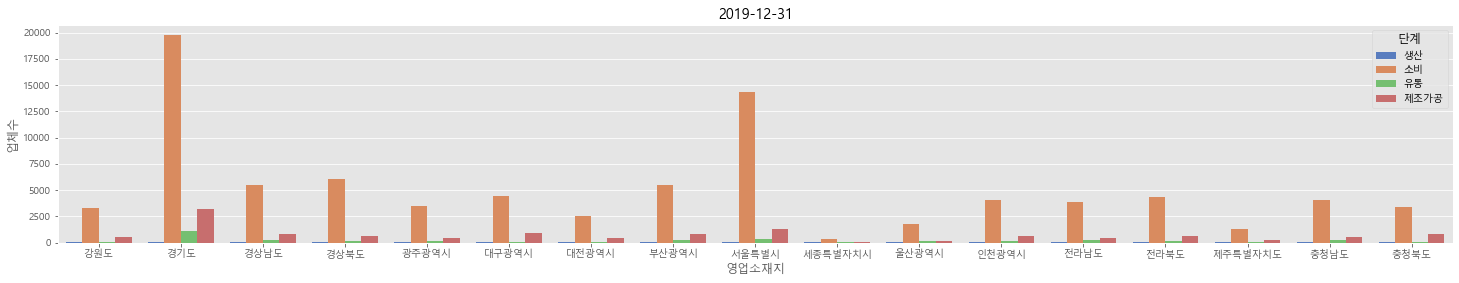

In [70]:
base_year = '2019-12-31' 
pd.to_datetime(base_year)

BSN_2019 = BSN[(BSN.폐업_일자 >= pd.to_datetime(base_year))]
BSN_2019.shape
data = BSN_2019.groupby(('영업소재지', '단계')).size().reset_index(name='업체수')
from matplotlib import rcParams
rcParams['figure.figsize'] = 25, 4
#fig, ax = pyplot.subplots(figsize=(25, 4))
print('지역별 영업중인 업체 현황 (기준년도' ,base_year, ')')
ax = sns.barplot(x='영업소재지', y='업체수', hue= '단계', data=data,palette="muted").set_title(base_year)

In [34]:
data.groupby('영업소재지').업체수.sum()
data.groupby('영업소재지').업체수.sum().sum()

영업소재지
강원도         3919
경기도        24178
경상남도        6520
경상북도        6861
광주광역시       4052
대구광역시       5429
대전광역시       3016
부산광역시       6458
서울특별시      15958
세종특별자치시      428
울산광역시       2018
인천광역시       4737
전라남도        4565
전라북도        5159
제주특별자치도     1543
충청남도        4845
충청북도        4383
Name: 업체수, dtype: int64

104069

# 1. 모든 인허가 업체
## (폐업여부 무시, 지도점검 여부 고려)
#### 전체 데이터크기는 BSN.shape에다 CHC.nunique의 개수별 지도점검 빈도를 곱한 값

In [52]:
A = set(BSN.영업_인허가_대장_번호.to_list()) # 전체업체
B = set(CHC.영업_인허가_대장_번호.to_list()) # 점검실시업체
C = set(PRDC.영업_인허가_대장_번호.to_list()) # 생산실적보고업체

print('전체 업체,  점검업체,  미점검업체', '생산실적보고업체')
len(A or B or C), len(B), len (A - B), len(C)
print('점검업체는 모두 전체업소에 포함되는가? if yes, then 0:', len(B - A))
print('점검업체중에서 생산실적보고한 업체수 ', len(B) and len(C))
print('미점검업체중에서 생산실적보고한 업체수 ', len(A - B) and len(C))

전체 업체,  점검업체,  미점검업체 생산실적보고업체


(212829, 62068, 150761, 12124)

점검업체는 모두 전체업소에 포함되는가? if yes, then 0: 0
점검업체중에서 생산실적보고한 업체수  12124
미점검업체중에서 생산실적보고한 업체수  12124


In [41]:
BSN_CHC = BSN.merge(CHC, on='영업_인허가_대장_번호', how='left').sort_values(by='점검결과', ascending=False)

BSN_CHC.shape, BSN_CHC.영업_인허가_대장_번호.nunique(), BSN_CHC.columns, 

((336518, 22),
 212829,
 Index(['영업_인허가_대장_번호', '영업소재지', '위도', '경도', '허가_일자', '폐업_일자', '업종코드', '단계',
        '지도점검년도', '점검결과', '점검', '위반', '점검 (n-1)', '위반 (n-1)', '점검 (n-2)',
        '위반 (n-2)', '점검 (n-3)', '위반 (n-3)', '점검 (n-4)', '위반 (n-4)', '점검 (n-5)',
        '위반 (n-5)'],
       dtype='object'))

In [42]:
BSN_CHC.head(5)

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,지도점검년도,점검결과,점검,위반,점검 (n-1),위반 (n-1),점검 (n-2),위반 (n-2),점검 (n-3),위반 (n-3),점검 (n-4),위반 (n-4),점검 (n-5),위반 (n-5)
300839,2017001000006245,인천광역시,126.748165,37.436991,2017-01-04,2020-12-31,042,소비,2017.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177097,1998001004314626,서울특별시,127.028545,37.615246,1998-07-28,2020-12-31,630,소비,2014.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177070,2003001004313004,서울특별시,127.034970,37.614060,2003-01-25,2020-12-31,630,소비,2016.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
302034,2018001000679951,인천광역시,126.703786,37.452898,2018-06-12,2020-12-31,042,소비,2019.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43484,2013001004268677,경상남도,128.882353,35.235856,2013-02-06,2020-12-31,630,소비,2013.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
Notnull_null_unique(BSN_CHC)

--- 3.9906463623046875 seconds of running time---


,Feature_Name,Notnull,Null,Unique
0,영업_인허가_대장_번호,336518,0,212829
6,업종코드,336518,0,15
7,단계,336518,0,4
5,폐업_일자,336517,1,7079
4,허가_일자,336513,5,12765
1,영업소재지,334482,2036,17
2,위도,236866,99652,87689
3,경도,236866,99652,87680
10,점검,185757,150761,25
11,위반,185757,150761,6


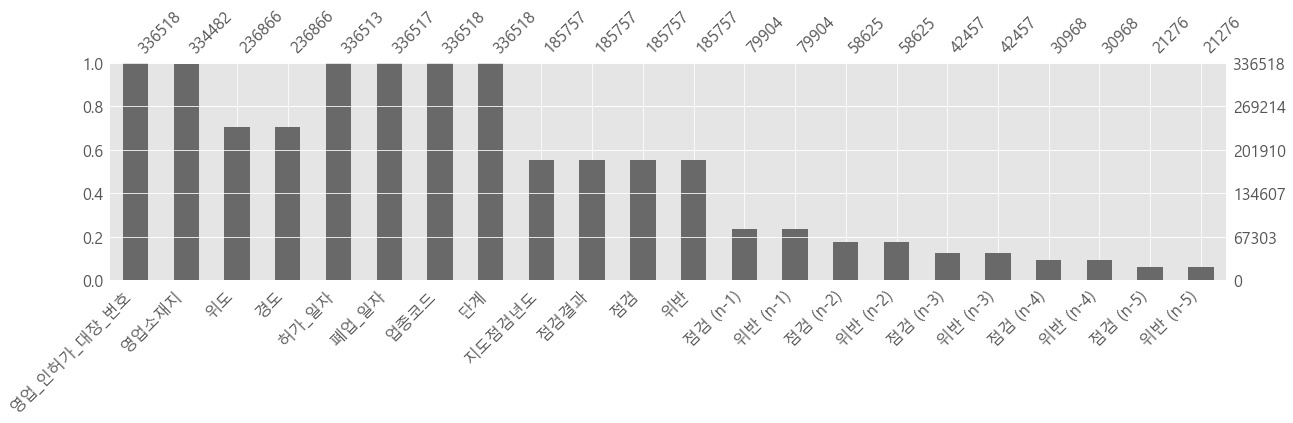

In [44]:
msno.bar(BSN_CHC, figsize=(20,4))

## 1.1 미점검업체

In [60]:
BSN_CHC_No = BSN_CHC[pd.isnull(BSN_CHC.지도점검년도)]

print('점검업체의 관측치가 맞는가 ?', BSN_CHC_No.shape[0] == len (A - B))

BSN_CHC_No.sort_values(by = '영업_인허가_대장_번호').head(3)

Notnull_null_unique(BSN_CHC_No).head()

점검업체의 관측치가 맞는가 ? False


,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,지도점검년도,점검결과,점검,위반,점검 (n-1),위반 (n-1),점검 (n-2),위반 (n-2),점검 (n-3),위반 (n-3),점검 (n-4),위반 (n-4),점검 (n-5),위반 (n-5)
255122,1004256440,경기도,NaN,NaN,1900-10-10,2012-11-19,604,제조가공,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150832,1004309167,서울특별시,127.038053,37.527869,1965-10-24,1992-04-11,630,소비,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117641,1004309168,서울특별시,127.023279,37.516585,2003-02-05,2018-11-16,630,소비,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--- 1.9031550884246826 seconds of running time---


,Feature_Name,Notnull,Null,Unique
0,영업_인허가_대장_번호,150761,0,150761
6,업종코드,150761,0,15
7,단계,150761,0,4
5,폐업_일자,150760,1,7026
4,허가_일자,150757,4,12094


## 2019.6.30기준 미점검 업체(영업중인 업체중에서)

In [80]:
base_year = '2020-12-31' 
pd.to_datetime(base_year)
BSN_CHC_No_2019 = BSN_CHC_No[(BSN_CHC_No.폐업_일자 >= pd.to_datetime(base_year))]
Notnull_null_unique(BSN_CHC_No_2019).head()

Timestamp('2020-12-31 00:00:00')

--- 2.49453067779541 seconds of running time---


,Feature_Name,Notnull,Null,Unique
0,영업_인허가_대장_번호,59582,0,59582
5,폐업_일자,59582,0,3
6,업종코드,59582,0,15
7,단계,59582,0,4
1,영업소재지,59581,1,17


In [81]:
BSN_CHC_No_2019.업종코드.value_counts()
BSN_CHC_No_2019.업종코드.value_counts().sum()

BSN_CHC_No_2019[BSN_CHC_No_2019.duplicated('영업_인허가_대장_번호')]

630    31492
042     8351
632     7006
634     4226
604     2517
008     2055
612     1732
635      958
631      731
007      307
611       92
043       75
613       28
006        7
005        5
Name: 업종코드, dtype: int64

59582

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,지도점검년도,점검결과,점검,위반,점검 (n-1),위반 (n-1),점검 (n-2),위반 (n-2),점검 (n-3),위반 (n-3),점검 (n-4),위반 (n-4),점검 (n-5),위반 (n-5)


In [82]:
A = set(BSN_CHC_No_2019.영업_인허가_대장_번호.to_list()) # 미점검업체
C = set(PRDC.영업_인허가_대장_번호.to_list()) # 생산실적보고업체
print('미점검업체수 ', len(A))
print('미점검업체중에서 생산실적보고한 업체수 ', len(A) and len(C))

미점검업체수  59582
미점검업체중에서 생산실적보고한 업체수  12124


## 1.2 점검업체

In [83]:
BSN_CHC_Yes = BSN_CHC[pd.notnull(BSN_CHC.지도점검년도)]

print('점검업체의 관측치가 맞는가 ?', BSN_CHC_Yes.영업_인허가_대장_번호.nunique() == len (A and B))

BSN_CHC_Yes.sort_values(by = '영업_인허가_대장_번호').head(3)

Notnull_null_unique(BSN_CHC_Yes).head()

점검업체의 관측치가 맞는가 ? True


,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,지도점검년도,점검결과,점검,위반,점검 (n-1),위반 (n-1),점검 (n-2),위반 (n-2),점검 (n-3),위반 (n-3),점검 (n-4),위반 (n-4),점검 (n-5),위반 (n-5)
141275,1004337637,서울특별시,NaN,NaN,1965-10-24,2012-10-12,630,소비,2011.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222455,1004340381,서울특별시,127.040968,37.569867,2002-12-10,2020-12-31,630,소비,2013.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57277,1004340382,서울특별시,127.040088,37.568705,2015-12-03,2020-12-31,630,소비,2015.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


--- 2.219066858291626 seconds of running time---


,Feature_Name,Notnull,Null,Unique
0,영업_인허가_대장_번호,185757,0,62068
6,업종코드,185757,0,15
10,점검,185757,0,25
9,점검결과,185757,0,2
8,지도점검년도,185757,0,12


## 2019.6.30기준 점검업체(영업중인 업체 중에서)

In [84]:
base_year = '2020-12-31' 
pd.to_datetime(base_year)
BSN_CHC_Yes_2019 = BSN_CHC_Yes[(BSN_CHC_Yes.폐업_일자 >= pd.to_datetime(base_year))]
Notnull_null_unique(BSN_CHC_Yes_2019).head()

BSN_CHC_Yes_2019.업종코드.value_counts()
BSN_CHC_Yes_2019.업종코드.value_counts().sum()

Timestamp('2020-12-31 00:00:00')

--- 1.6665449142456055 seconds of running time---


,Feature_Name,Notnull,Null,Unique
0,영업_인허가_대장_번호,146591,0,44488
7,단계,146591,0,4
1,영업소재지,146591,0,17
10,점검,146591,0,25
9,점검결과,146591,0,2


630    76656
604    23770
042    12709
612    11694
635     5664
632     4173
631     3064
611     1973
005     1892
634     1355
613     1263
008      965
007      963
006      448
043        2
Name: 업종코드, dtype: int64

146591

### 업소별로 점검실적이 여러변 있어서 중복되는 인허가 번호는 제외하고 

In [97]:
BSN_CHC_No_2019.shape, BSN_CHC_No_2019.영업_인허가_대장_번호.nunique()
BSN_CHC_Yes_2019.shape, BSN_CHC_Yes_2019.영업_인허가_대장_번호.nunique()

((59582, 22), 59582)

((146591, 22), 44488)

In [98]:
BSN_CHC_Yes_2019.drop_duplicates('영업_인허가_대장_번호').head()
BSN_CHC_Yes_2019.drop_duplicates('영업_인허가_대장_번호').업종코드.value_counts()

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,지도점검년도,점검결과,점검,위반,점검 (n-1),위반 (n-1),점검 (n-2),위반 (n-2),점검 (n-3),위반 (n-3),점검 (n-4),위반 (n-4),점검 (n-5),위반 (n-5)
300839,2017001000006245,인천광역시,126.748165,37.436991,2017-01-04,2020-12-31,042,소비,2017.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177097,1998001004314626,서울특별시,127.028545,37.615246,1998-07-28,2020-12-31,630,소비,2014.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177070,2003001004313004,서울특별시,127.034970,37.614060,2003-01-25,2020-12-31,630,소비,2016.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
302034,2018001000679951,인천광역시,126.703786,37.452898,2018-06-12,2020-12-31,042,소비,2019.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43484,2013001004268677,경상남도,128.882353,35.235856,2013-02-06,2020-12-31,630,소비,2013.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


630    23363
042     5505
604     5160
612     2615
632     2597
635     2047
631      832
634      819
008      526
007      376
611      286
613      153
005      147
006       60
043        2
Name: 업종코드, dtype: int64

In [ ]:
BSN_CHC_Yes_2019_unique = BSN_CHC_Yes_2019[BSN_CHC_Yes_2019.duplicated('영업_인허가_대장_번호')]
BSN_CHC_Yes_2019_unique.shape
df.drop_duplicates(subset=['A', 'C'], keep=False)

,업종,업체 수,미점검,점검,단속,단속회수,점검비율
0,유가공업(611),378,92,286,1973,7.0,75.66
1,식육가공업(612),4347,1732,2615,11694,4.0,60.16
2,알가공업(613),181,28,153,1263,8.0,84.53
3,식육포장처리업(604),7677,2517,5160,23770,5.0,67.21
4,축산물보관업(007),683,307,376,963,3.0,55.05
5,축산물운반업(008),2581,2055,526,965,2.0,20.38
6,식육판매업(630),54855,31492,23363,76656,3.0,42.59
7,식육부산물전문판매업(631),1563,731,832,3064,4.0,53.23
8,우유류판매업(632),9603,7006,2597,4173,2.0,27.04
9,축산물유통전문판매업(634),5045,4226,819,1355,2.0,16.23


업종별 위생점검 현황 (기준년도 2019-12-31 )


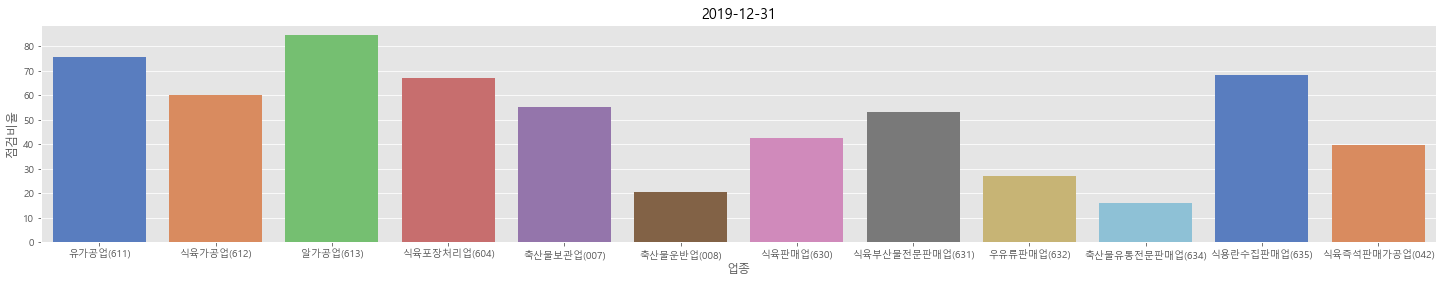

In [79]:
data = pd.read_excel('../working/EDA.xlsx')
data['단속회수'] = round(data['단속']/data['점검'], 0)
data['점검비율'] = round(data['점검']/data['업체 수'] *100, 2)
data

from matplotlib import rcParams
rcParams['figure.figsize'] = 25, 4
#fig, ax = pyplot.subplots(figsize=(25, 4))


print('업종별 위생점검 현황 (기준년도' ,base_year, ')')
ax = sns.barplot(x='업종', y='점검비율', data=data,palette="muted").set_title(base_year)

지역별 업체  단속회수 현황 (기준년도 2019-12-31 )


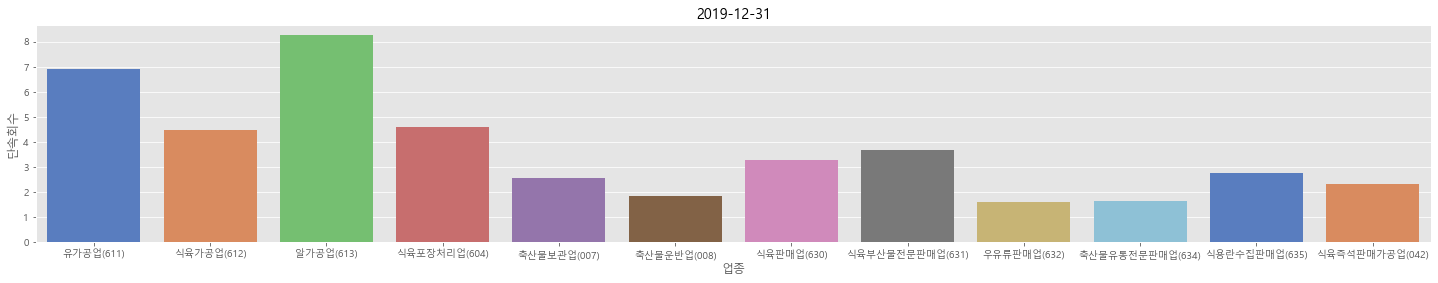

In [78]:
print('지역별 업체  단속회수 현황 (기준년도' ,base_year, ')')
ax = sns.barplot(x='업종', y='단속회수', data=data,palette="muted").set_title(base_year)

In [64]:
A = set(BSN_CHC_Yes_2019.영업_인허가_대장_번호.to_list()) # 점검업체
C = set(PRDC.영업_인허가_대장_번호.to_list()) # 생산실적보고업체

print('점검업체수 ', len(A))
print('미점검업체중에서 생산실적보고한 업체수 ', len(A) and len(C))

점검업체수  44488
미점검업체중에서 생산실적보고한 업체수  12124


## 1.3  1회만 위생점검을 받은 업체

In [83]:
check = ['점검', '위반', '점검 (n-1)', '위반 (n-1)', '점검 (n-2)', '위반 (n-2)', '점검 (n-3)',
         '위반 (n-3)', '점검 (n-4)', '위반 (n-4)', '점검 (n-5)', '위반 (n-5)']

for i in check :
    BSN_CHC_Yes[i]= BSN_CHC_Yes[i].fillna(0)

BSN_CHC_Yes.columns

# 위생점검이 1회인 업체
check = ['점검', '점검 (n-1)', '점검 (n-2)', '점검 (n-3)', '점검 (n-4)', '점검 (n-5)']
BSN_CHC_Yes['점검회수'] = BSN_CHC_Yes[check].sum(axis=1)

BSN_CHC_One = BSN_CHC_Yes[BSN_CHC_Yes.점검회수 == 1]

BSN_CHC_One.sort_values(by = '영업_인허가_대장_번호').head(3)

Index(['영업_인허가_대장_번호', '영업소재지', '위도', '경도', '허가_일자', '폐업_일자', '업종코드', '단계',
       '지도점검년도', '점검결과', '점검', '위반', '점검 (n-1)', '위반 (n-1)', '점검 (n-2)',
       '위반 (n-2)', '점검 (n-3)', '위반 (n-3)', '점검 (n-4)', '위반 (n-4)', '점검 (n-5)',
       '위반 (n-5)'],
      dtype='object')

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,지도점검년도,점검결과,점검,위반,점검 (n-1),위반 (n-1),점검 (n-2),위반 (n-2),점검 (n-3),위반 (n-3),점검 (n-4),위반 (n-4),점검 (n-5),위반 (n-5),점검회수
57277,1004340382,서울특별시,127.040088,37.568705,2015-12-03,2020-12-31,630,소비,2015.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
163108,1004340383,서울특별시,127.040329,37.568671,2002-12-10,2020-12-31,630,소비,2017.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
243737,1004340386,서울특별시,127.034512,37.570492,2002-12-10,2020-12-31,630,소비,2018.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
BSN_CHC_One[BSN_CHC_One['영업_인허가_대장_번호'].duplicated()].head()
BSN_CHC_One = BSN_CHC_One.drop_duplicates(subset=['영업_인허가_대장_번호'], keep= 'first')

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,지도점검년도,점검결과,점검,위반,점검 (n-1),위반 (n-1),점검 (n-2),위반 (n-2),점검 (n-3),위반 (n-3),점검 (n-4),위반 (n-4),점검 (n-5),위반 (n-5),점검회수
241737,2013001004270776,경상남도,129.050333,35.395836,2013-04-18,2020-12-31,630,소비,2016.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
287915,2008001004236606,경기도,127.250403,37.387667,2008-08-11,2020-12-31,604,제조가공,2019.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
240700,2005001004284278,대구광역시,128.557463,35.835281,2005-06-10,2020-12-31,630,소비,2014.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
221890,2009001004342764,서울특별시,126.997869,37.560836,2009-07-09,2020-12-31,630,소비,2016.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
221886,2001001004341023,서울특별시,127.011540,37.560893,2001-04-11,2020-12-31,630,소비,2016.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [85]:
Notnull_null_unique(BSN_CHC_One).head(5)

--- 0.8706681728363037 seconds of running time---


,Feature_Name,Notnull,Null,Unique
0,영업_인허가_대장_번호,34186,0,34186
12,점검 (n-1),34186,0,2
21,위반 (n-5),34186,0,2
20,점검 (n-5),34186,0,2
19,위반 (n-4),34186,0,2


In [86]:
BSN_CHC_One.업종코드.value_counts()
BSN_CHC_One.업종코드.value_counts().sum()

630    19162
604     4874
042     3151
612     2486
635     1467
632      887
631      623
634      336
611      303
007      259
008      234
613      183
005      159
006       62
Name: 업종코드, dtype: int64

34186

# 2. 자료 현황
## 2.1 년도/업종별 운영 업체 추출(위생점검 대상업체, 생산실적 보고의무 업체)
- 모든 업체 : BSN_CHC 
- 미점검업체 : BSN_CHC_No
- 점검업체 : BSN_CHC_Yes

2018년도에 영업중인 업체는 2018.12.31이전에 허가를 내고 2018.12.31 이후에 폐업을 한 업체의 데이터를 추출하여
해당 데이터의 수만큼 영업년도를 특정하는 코드

In [94]:
BSN.info()
BSN['허가_일자'].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212829 entries, 0 to 212828
Data columns (total 8 columns):
영업_인허가_대장_번호    212829 non-null int64
영업소재지           210793 non-null object
위도              120774 non-null float64
경도              120774 non-null float64
허가_일자           212824 non-null datetime64[ns]
폐업_일자           212828 non-null datetime64[ns]
업종코드            212829 non-null object
단계              212829 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 14.6+ MB


0   2007-05-28
1   2010-02-16
2   1998-08-05
3   2016-02-16
4   1991-07-12
Name: 허가_일자, dtype: datetime64[ns]

In [95]:
year_period = ['2009-12-31','2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31'
               ,'2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31']
BSN.head()

BSN_yearly_live = pd.DataFrame()

for year in year_period :
    #print(np.datetime64(year, 'Y'),'년도에 영업중인 업체')
    #BSN[(BSN.허가_일자 <= np.datetime64(year, 'D')) & (BSN.폐업_일자 > np.datetime64(year, 'D'))].shape

    company = (BSN[(BSN.허가_일자 <= np.datetime64(year, 'D')) & (BSN.폐업_일자 > np.datetime64(year, 'D'))]
               .assign(영업년도 = [np.datetime64(year, 'Y') for i in np.arange(0, BSN[(BSN.허가_일자 <= np.datetime64(year, 'D')) & \
                                                                                   (BSN.폐업_일자 > np.datetime64(year, 'D'))]
                                                                           .shape[0])])
    )
    
#data_2008_ok = data_2008_ok.assign(영업년도 = [corresponding_year for i in np.arange(0, data_2008_ok.shape[0])]) 같은 명령

    BSN_yearly_live  = BSN_yearly_live .append(company,ignore_index=True)
    

for (영업년도, group) in BSN_yearly_live.groupby('영업년도') :
    print('{0}년도(기준년도)에 영업중인 업체 : {1} 개'.format(영업년도.year, group.shape[0]))

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계
0,2007001004223363,경상남도,NaN,NaN,2007-05-28,2010-04-15,632,소비
1,2010001004248896,경기도,NaN,NaN,2010-02-16,2013-06-28,632,소비
2,1998001004358539,전라남도,126.395260,34.795768,1998-08-05,2018-08-29,632,소비
3,2016001000070198,경기도,127.100901,37.255922,2016-02-16,2018-05-04,632,소비
4,1991001004335127,서울특별시,127.032842,37.550216,1991-07-12,2020-12-31,632,소비


2009년도(기준년도)에 영업중인 업체 : 70254 개
2010년도(기준년도)에 영업중인 업체 : 72707 개
2011년도(기준년도)에 영업중인 업체 : 76295 개
2012년도(기준년도)에 영업중인 업체 : 79789 개
2013년도(기준년도)에 영업중인 업체 : 83822 개
2014년도(기준년도)에 영업중인 업체 : 88932 개
2015년도(기준년도)에 영업중인 업체 : 93161 개
2016년도(기준년도)에 영업중인 업체 : 97059 개
2017년도(기준년도)에 영업중인 업체 : 100542 개
2018년도(기준년도)에 영업중인 업체 : 102691 개
2019년도(기준년도)에 영업중인 업체 : 104063 개


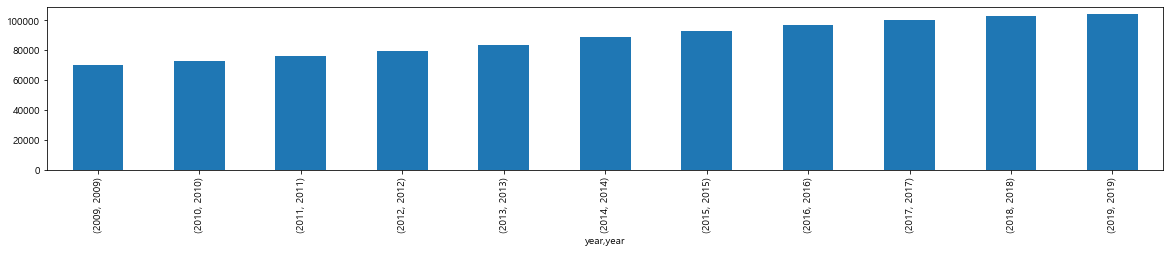

In [96]:
BSN_yearly_live['year'] = BSN_yearly_live.영업년도.apply(lambda x: x.year)
BSN_yearly_live.groupby('year').year.value_counts().plot(kind ='bar', figsize =(20,3))

In [97]:
BSN_yearly_live .head()
BSN_yearly_live .shape, BSN_yearly_live .columns
# BSN_yearly_live['month'] = BSN_yearly_live.영업년도.apply(lambda x: x.month)
# BSN_yearly_live['week'] = BSN_yearly_live.영업년도.apply(lambda x: x.week)
# BSN_yearly_live['day'] = BSN_yearly_live.영업년도.apply(lambda x: x.day)

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,영업년도,year
0,2007001004223363,경상남도,NaN,NaN,2007-05-28,2010-04-15,632,소비,2009-01-01,2009
1,1998001004358539,전라남도,126.395260,34.795768,1998-08-05,2018-08-29,632,소비,2009-01-01,2009
2,1991001004335127,서울특별시,127.032842,37.550216,1991-07-12,2020-12-31,632,소비,2009-01-01,2009
3,2004001004280023,경상북도,128.395483,35.986608,2004-04-30,2019-01-15,632,소비,2009-01-01,2009
4,1999001004247136,경기도,NaN,NaN,1999-06-10,2011-04-29,632,소비,2009-01-01,2009


((969315, 10),
 Index(['영업_인허가_대장_번호', '영업소재지', '위도', '경도', '허가_일자', '폐업_일자', '업종코드', '단계',
        '영업년도', 'year'],
       dtype='object'))

## 2.2 년도/업종별 운영 업체  현황

### 2.2.1  2019년도 업종 유형 현황

Text(0.5, 1.0, '2019년도 영업중인 축산물업종 현황')

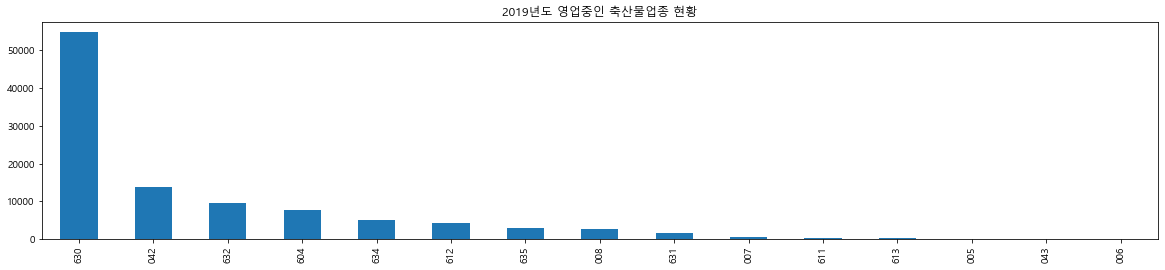

In [98]:
plt.title('2019년도 영업중인 축산물업종 현황')
BSN_yearly_live[(BSN_yearly_live.영업년도 == datetime(2019, 1, 1))].업종코드.value_counts(dropna = False).plot(kind="bar", figsize=(20,4))

### 2.2.2 년도별 업종유형별 (혹은 식품공급망 단계별) 현황

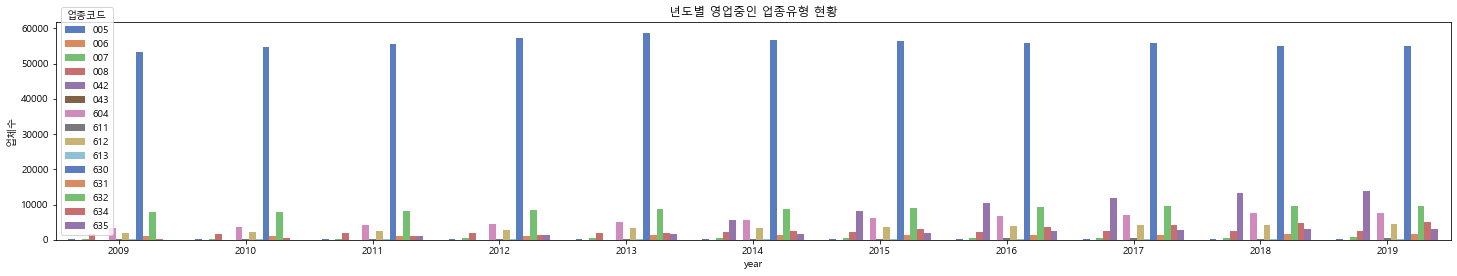

In [99]:
data = BSN_yearly_live.groupby(['영업년도', '업종코드']).size().reset_index(name='업체수')
data['year'] = data.영업년도.apply(lambda x: x.year)
from matplotlib import rcParams
rcParams['figure.figsize'] = 25, 4
#fig, ax = pyplot.subplots(figsize=(25, 4))
ax = sns.barplot(x='year', y='업체수', hue= '업종코드', data=data, palette="muted").set_title('년도별 영업중인 업종유형 현황')

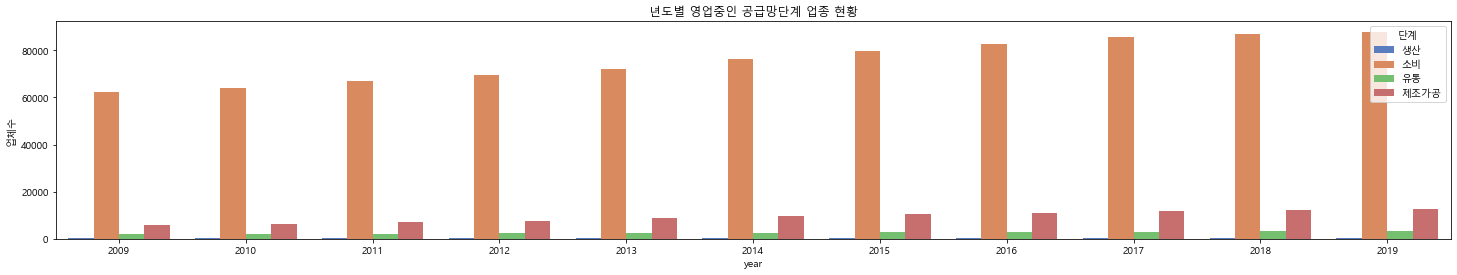

In [100]:
data = BSN_yearly_live.groupby(['영업년도', '단계']).size().reset_index(name='업체수')
data['year'] = data.영업년도.apply(lambda x: x.year)
from matplotlib import rcParams
rcParams['figure.figsize'] = 25, 4
#fig, ax = pyplot.subplots(figsize=(25, 4))
ax = sns.barplot(x='year', y='업체수', hue= '단계', data=data, palette="muted").set_title('년도별 영업중인 공급망단계 업종 현황')

### 2.3 지역별 현황 (2019년 영업중인 업체 기준)

#### 2.3.1 영업일 (2019년 영업중인 업체 기준)

Text(0.5, 1.0, '2019년도 영업중인 축산물업종 영업기간(일자) 현황')

9389 days       1
13423 days      1
11377 days      1
12426 days      1
13716 days      1
             ... 
4 days        375
12 days       386
14 days       633
13 days       773
0 days        801
Name: 영업일, Length: 13307, dtype: int64

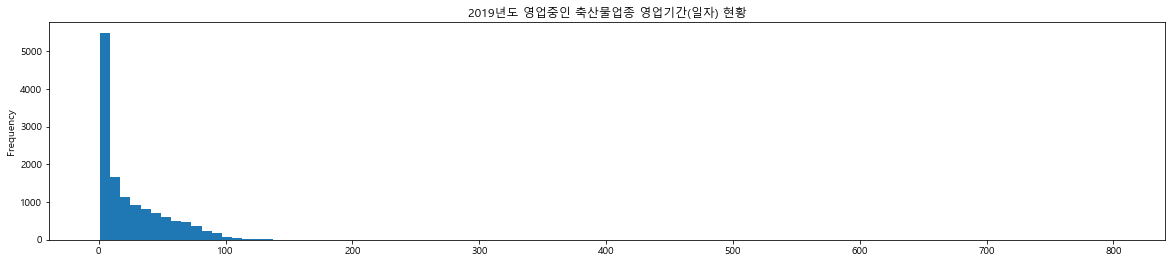

In [101]:
BSN_CHC['영업일'] = BSN_CHC['폐업_일자'] - BSN_CHC['허가_일자']

plt.title('2019년도 영업중인 축산물업종 영업기간(일자) 현황')
BSN_CHC['영업일'].value_counts().sort_values()
BSN_CHC['영업일'].value_counts().plot(kind='hist', bins=100, figsize=(20,4))

Text(0.5, 1.0, '지역별 위생점검 실적 누적현황(2008년 ~)')

334482

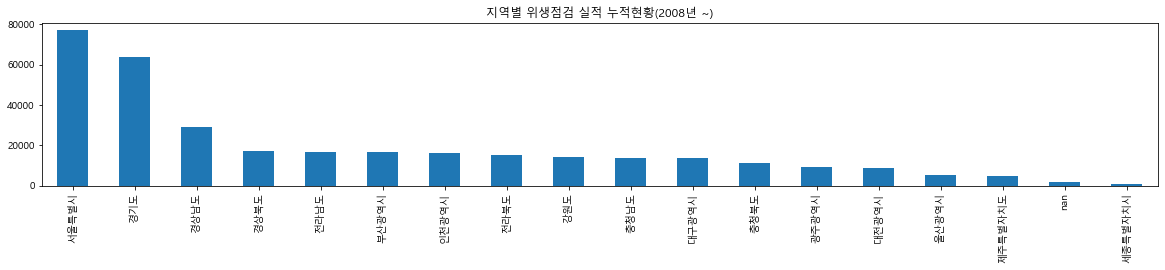

In [102]:
plt.title('지역별 위생점검 실적 누적현황(2008년 ~)')
BSN_CHC.영업소재지.value_counts(dropna = False).plot(kind ='bar', figsize =(20,3)) # 지도점검이 있는 업체만
BSN_CHC.영업소재지.value_counts().sum() # value_counts(dropna=False) 명령어를 삭제하여야 nan(미점검업체)를 제외함

Text(0.5, 1.0, '년도별 위생점검 실적 누적현황(2008년 ~)')

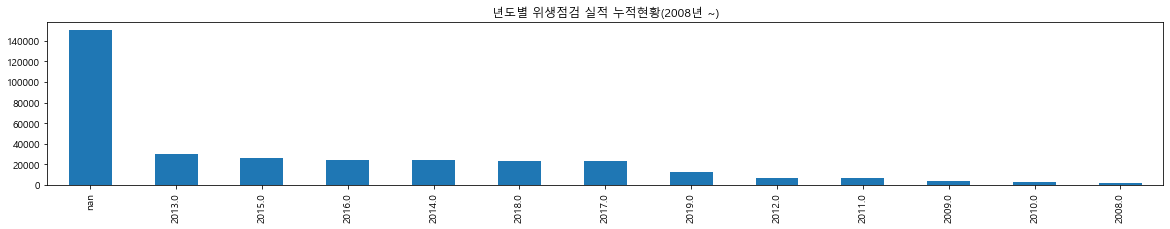

In [103]:
plt.title('년도별 위생점검 실적 누적현황(2008년 ~)')
BSN_CHC.지도점검년도.value_counts(dropna = False).plot(kind ='bar', figsize =(20,3))

# 3. 지도 
#### BSN_CHC_Yes, BSN_CHC_No 파일로 확인하여야 함

### 지역별 현황 (2019년 영업중인 업체 기준)
### Folium : Spatial visulaization
https://towardsdatascience.com/data-101s-spatial-visualizations-and-analysis-in-python-with-folium-39730da2adf 

- 모든 업체 :  BSN_CHC = BSN.merge(CHC, on='영업_인허가_대장_번호', how='left').sort_values(by='점검결과', ascending=False)
- 미점검업체 : BSN_CHC_No = BSN_CHC[pd.isnull(BSN_CHC.지도점검년도)]
- 점검업체 : BSN_CHC_Yes = BSN_CHC[pd.notnull(BSN_CHC.지도점검년도)]

### 3.1 기존 데이터 재확인 by missingno

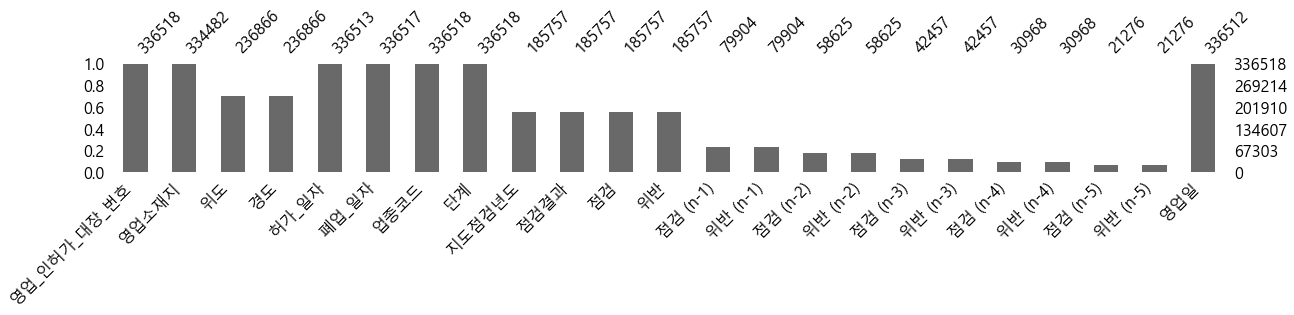

In [68]:
msno.bar(BSN_CHC, figsize=(20,2)) # 위도 경도 점검원인_유형코드 등 제외 Full moon

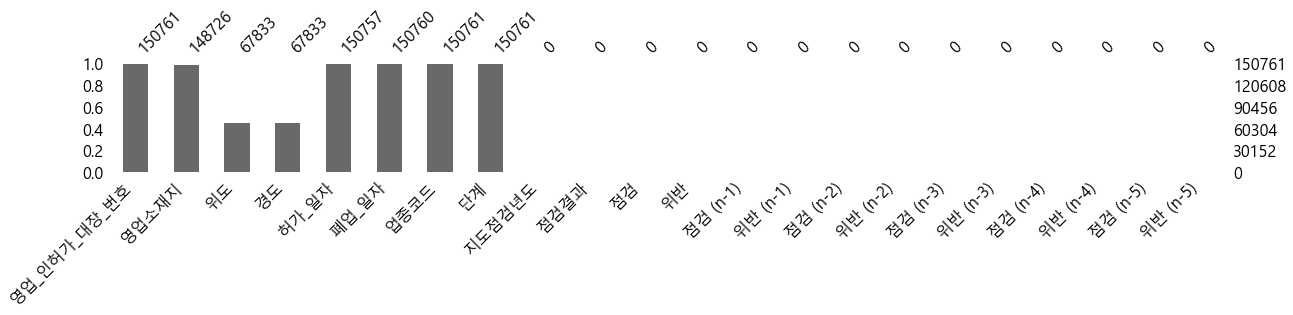

In [69]:
msno.bar(BSN_CHC_No, figsize=(20,2))

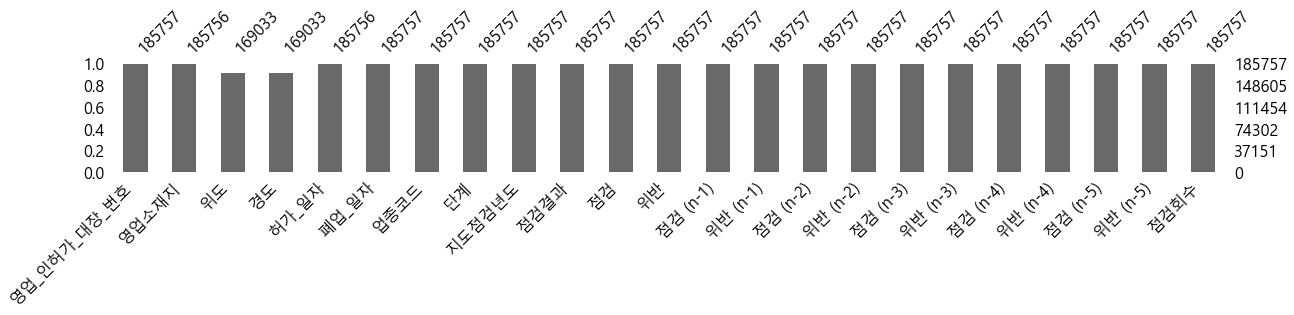

In [70]:
msno.bar(BSN_CHC_Yes, figsize=(20,2))

###  3.2 위/경도가 존재하는 데이터만 추출하여 지도에 mapping

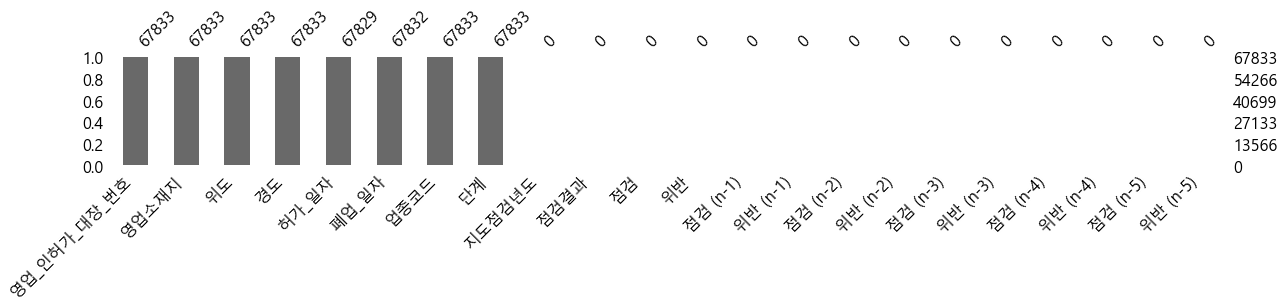

In [71]:
msno.bar(BSN_CHC_No.dropna(subset=['위도', '경도', '영업소재지']), figsize=(20,2))
BSN_CHC_No_map = BSN_CHC_No.dropna(subset=['위도', '경도', '영업소재지'])

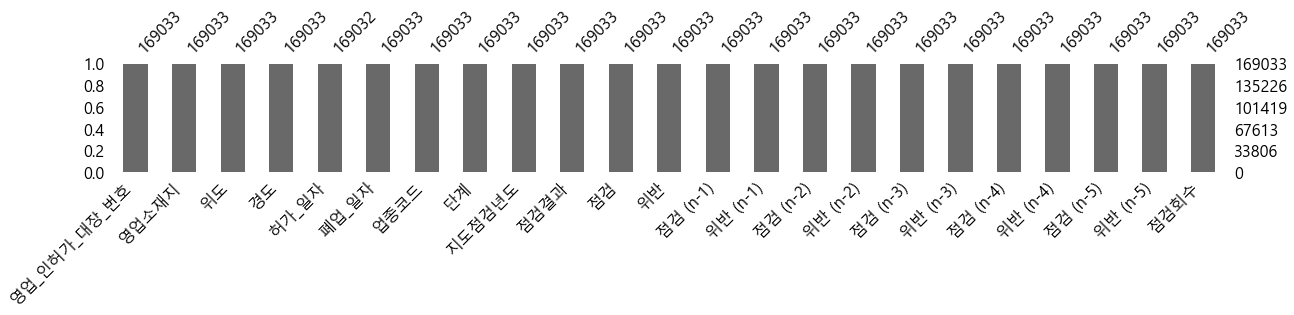

In [72]:
msno.bar(BSN_CHC_Yes.dropna(subset=['위도', '경도', '영업소재지']), figsize=(20,2))
BSN_CHC_Yes_map = BSN_CHC_Yes.dropna(subset=['위도', '경도', '영업소재지'])

## 3.1 미점검 업체 (지역별)
### BSN_CHC_No_map

In [73]:
BSN_CHC_No_map = BSN_CHC_No_map[['위도', '경도', '업종코드', '지도점검년도', '단계']]
BSN_CHC_Yes_map = BSN_CHC_Yes_map[['위도', '경도', '업종코드', '지도점검년도', '단계', '점검회수']]

In [75]:
print('(점검/비점검) 업체 비율', BSN_CHC_Yes.영업_인허가_대장_번호.nunique()/BSN_CHC_No.영업_인허가_대장_번호.nunique())

(점검/비점검) 업체 비율 0.41169798555329296


In [76]:
#region = BSN_CHC.영업소재지.value_counts().reset_index().rename(columns={'index' : '시도'}).시도.to_list()

BSN_CHC_map = BSN_CHC[['위도', '경도', '업종코드', '지도점검년도', '단계']]
BSN_CHC_map = BSN_CHC_map.dropna(subset=['위도', '경도'])
Notnull_null_unique(BSN_CHC_map)

BSN_CHC_map = BSN_CHC[['위도', '경도', '업종코드', '지도점검년도', '단계']]

BSN_CHC_map.지도점검년도.notnull() == True

--- 4.204054594039917 seconds of running time---


,Feature_Name,Notnull,Null,Unique
0,위도,236866,0,87689
1,경도,236866,0,87680
2,업종코드,236866,0,15
4,단계,236866,0,4
3,지도점검년도,169033,67833,12


300839     True
177097     True
177070     True
302034     True
43484      True
177075     True
302075     True
177086     True
177090     True
177091     True
302084     True
234805     True
177207     True
302109     True
177111     True
43434      True
177127     True
302141     True
302143     True
43404      True
177171     True
43393      True
302031     True
177052     True
301999     True
43567      True
301778     True
301782     True
176857     True
301827     True
          ...  
334570    False
334571    False
334588    False
334596    False
334600    False
334601    False
334602    False
334603    False
334604    False
334605    False
334606    False
334607    False
334608    False
334618    False
334619    False
334620    False
334621    False
334626    False
334635    False
334648    False
334707    False
334793    False
334794    False
334807    False
334808    False
334974    False
335076    False
335679    False
336079    False
336502    False
Name: 지도점검년도, Length: 33

In [141]:
BSN_CHC_map.head()

,위도,경도,업종코드,지도점검년도,단계
300839,126.748165,37.436991,042,2017.0,소비
177097,127.028545,37.615246,630,2014.0,소비
177070,127.034970,37.614060,630,2016.0,소비
302034,126.703786,37.452898,042,2019.0,소비
43484,128.882353,35.235856,630,2013.0,소비


In [79]:
def save_map(df):
    minlong = df['위도'].min()
    maxlong = df['위도'].max()
    minlat = df['경도'].min()
    maxlat = df['경도'].max()

    m = folium.Map([maxlat, minlong], zoom_start=12)
    
    for i in range(df.shape[0]):
        folium.CircleMarker(location=[df['경도'].iloc[i], 
                                      df['위도'].iloc[i]], 
                                color='b',
                        fill_color='b').add_to(m)
        
    m.save('../working/점검업체.html') 
    
    return m

save_map(BSN_CHC_Yes_map.sample(n=300, replace=True, random_state=1))

In [78]:
def save_map(df):
    minlong = df['위도'].min()
    maxlong = df['위도'].max()
    minlat = df['경도'].min()
    maxlat = df['경도'].max()

    m = folium.Map([minlat, minlong], zoom_start=12)
    
    for i in range(df.shape[0]):
        folium.CircleMarker(location=[df['경도'].iloc[i], 
                                      df['위도'].iloc[i]], 
                                color='b',
                        fill_color='red').add_to(m)
        
    m.save('../working/미점검업체.html') 
    
    return m

save_map(BSN_CHC_No_map.sample(n=300, replace=True, random_state=1))

In [237]:
#    def save_map(df, region):
  
#     minlong = df['위도'].min()
#     maxlong = df['위도'].max()
#     minlat = df['경도'].min()
#     maxlat = df['경도'].max()

#     m = folium.Map([minlat, minlong], zoom_start=12)

#     for i in range(df.shape[0]):
#         folium.CircleMarker(location=[df['경도'].iloc[i], 
#                                       df['위도'].iloc[i]], 
#                                 color='b',
#                         fill_color='b').add_to(m)
        
#     m.save('../working/' + 'BSN_CHC_No' + region + '.html') 
    
#     return m


# for i in region :
#     save_map(BSN_CHC_Yes[(BSN_CHC_Yes.영업소재지 == i)].sample(n=1000, replace=True, random_state=1), i)

## 3.4 점검 미점검 현황

### 3.4.1 년도별 업종별 현황

212829

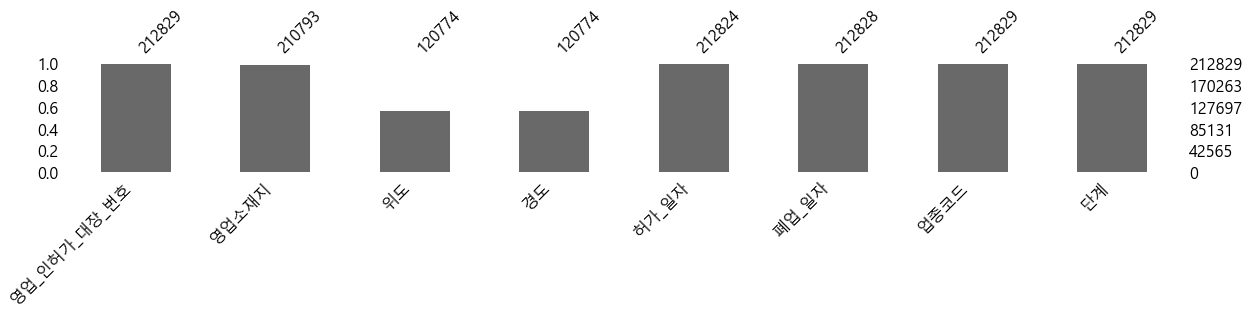

In [80]:
msno.bar(BSN, figsize=(20,2)) # 인허가정보대장
BSN.영업_인허가_대장_번호.nunique()

212829

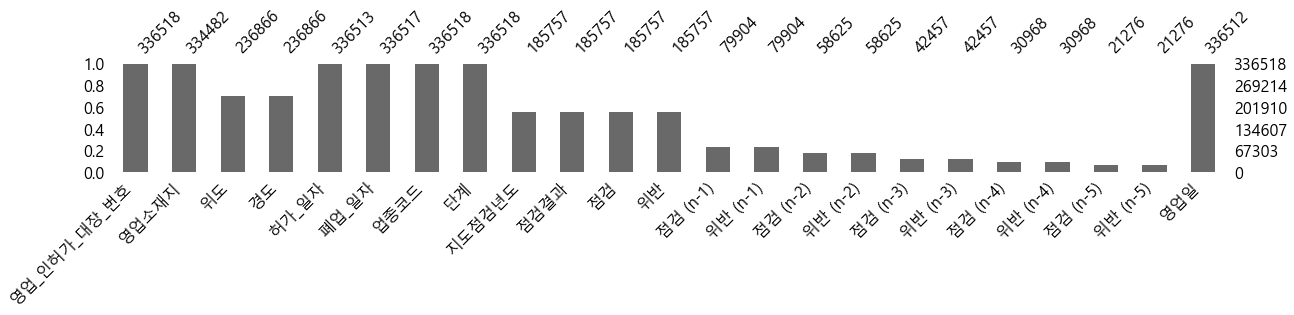

In [81]:
msno.bar(BSN_CHC, figsize=(20,2)) # 검검/미점검 대장
BSN_CHC.영업_인허가_대장_번호.nunique()

159871

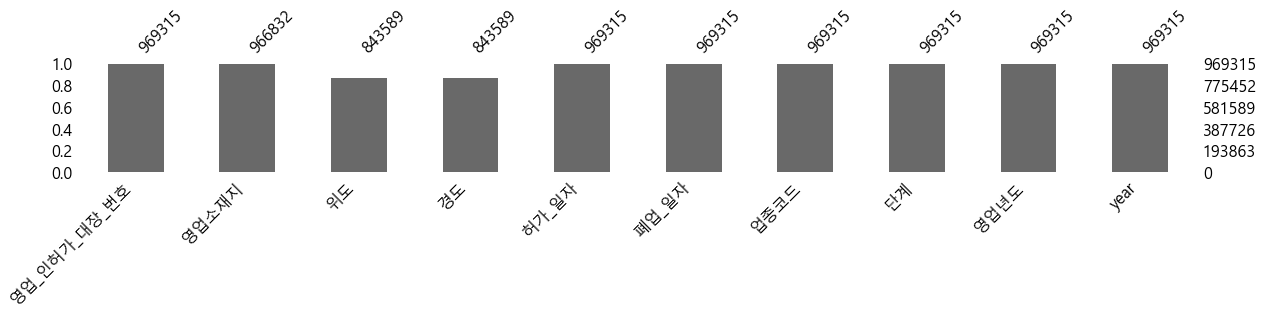

In [82]:
msno.bar(BSN_yearly_live, figsize=(20,2)) # 년도별로 영업중인 인허가정보 대장
BSN_yearly_live.영업_인허가_대장_번호.nunique()

In [83]:
#BSN_yearly_live.groupby('영업년도').size().value_counts(dropna = False).plot(kind ='bar', figsize =(20,3))

Text(0.5, 1.0, '년도별 영업중인 업체 현황 추이')

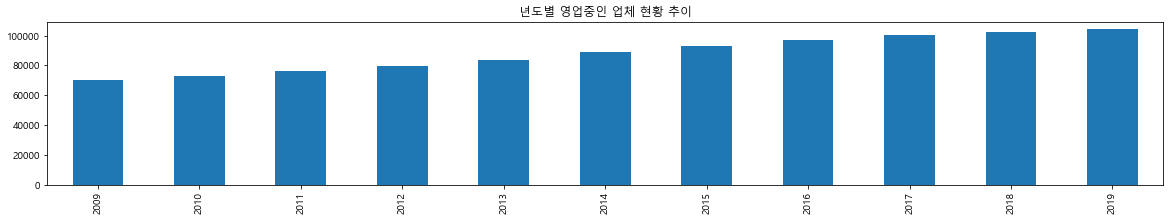

In [84]:
BSN_yearly_live.영업년도 = BSN_yearly_live.영업년도.dt.year
plt.title('년도별 영업중인 업체 현황 추이')
BSN_yearly_live.영업년도.value_counts(dropna = False).sort_values().plot(kind ='bar', figsize =(20,3))

Text(0.5, 1.0, '2019년 가공단계 영업중인 업체 현황')

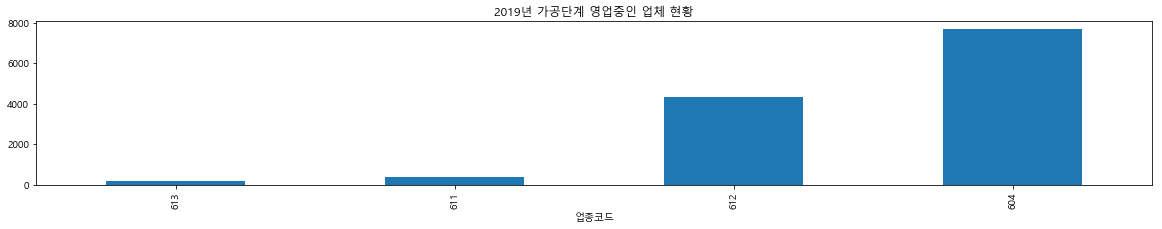

In [85]:
plt.title('2019년 가공단계 영업중인 업체 현황')
(BSN_yearly_live[(BSN_yearly_live.영업년도 == pd.to_datetime('2019-1-1').year) & (BSN_yearly_live.단계.astype('category') == '제조가공')].
 groupby('업종코드').size().sort_values().plot(kind ='bar', figsize =(20,3)))

Text(0.5, 1.0, '년도별 가공단계 영업중인 업체 현황')

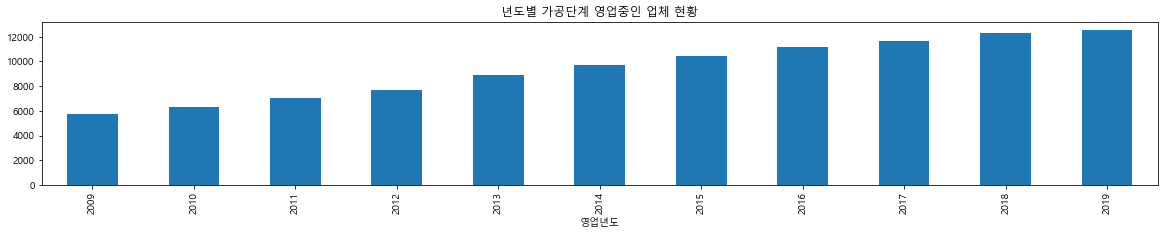

In [86]:
plt.title('년도별 가공단계 영업중인 업체 현황')
(BSN_yearly_live[BSN_yearly_live.단계.astype('category') == '제조가공']. groupby('영업년도').size().sort_values().plot(kind ='bar', figsize =(20,3)))

Text(0.5, 1.0, '년도별 판매단계 영업중인 업체 현황')

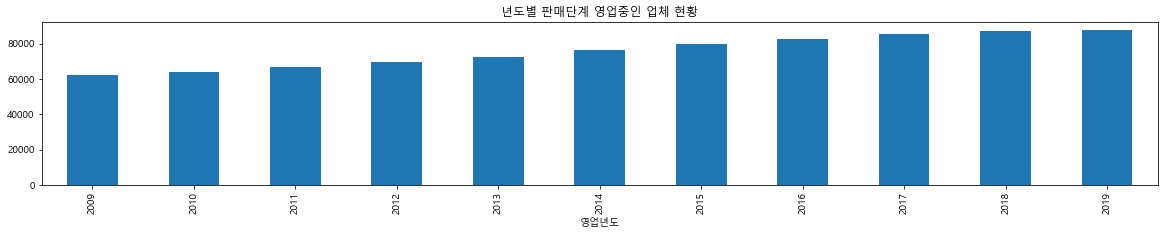

In [87]:
plt.title('년도별 판매단계 영업중인 업체 현황')
(BSN_yearly_live[BSN_yearly_live.단계.astype('category') == '소비'].groupby('영업년도').size().sort_values().plot(kind ='bar', figsize =(20,3)))

### 3.4.2 점검 미점검 업체 현황

In [88]:
BSN_CHC['점검수']= BSN_CHC['점검']+BSN_CHC['점검 (n-1)']+BSN_CHC['점검 (n-2)']+BSN_CHC['점검 (n-3)']+BSN_CHC['점검 (n-4)']+ BSN_CHC['점검 (n-5)']

BSN_CHC['위반수']= BSN_CHC['위반']+BSN_CHC['위반 (n-1)']+BSN_CHC['위반 (n-2)']+BSN_CHC['위반 (n-3)']+BSN_CHC['위반 (n-4)']+ BSN_CHC['위반 (n-5)']

#### 업종별 단속비단속업체 비율(특정기간), 단속업체의 특징(생산실적보고를 한 업체를 갔느지?), 단속점검회수 및 적발 빈도 및 출현 순서

In [89]:
BSN_CHC[pd.isnull(BSN_CHC.지도점검년도)].head(3)
BSN_CHC[pd.notnull(BSN_CHC.지도점검년도)].head(3)

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,지도점검년도,점검결과,점검,위반,점검 (n-1),위반 (n-1),점검 (n-2),위반 (n-2),점검 (n-3),위반 (n-3),점검 (n-4),위반 (n-4),점검 (n-5),위반 (n-5),영업일,점검수,위반수
0,2007001004223363,경상남도,NaN,NaN,2007-05-28,2010-04-15,632,소비,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1053 days,NaN,NaN
1,2010001004248896,경기도,NaN,NaN,2010-02-16,2013-06-28,632,소비,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1228 days,NaN,NaN
3,2016001000070198,경기도,127.100901,37.255922,2016-02-16,2018-05-04,632,소비,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,808 days,NaN,NaN


,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,지도점검년도,점검결과,점검,위반,점검 (n-1),위반 (n-1),점검 (n-2),위반 (n-2),점검 (n-3),위반 (n-3),점검 (n-4),위반 (n-4),점검 (n-5),위반 (n-5),영업일,점검수,위반수
300839,2017001000006245,인천광역시,126.748165,37.436991,2017-01-04,2020-12-31,042,소비,2017.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1457 days,NaN,NaN
177097,1998001004314626,서울특별시,127.028545,37.615246,1998-07-28,2020-12-31,630,소비,2014.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8192 days,NaN,NaN
177070,2003001004313004,서울특별시,127.034970,37.614060,2003-01-25,2020-12-31,630,소비,2016.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,6550 days,NaN,NaN


In [90]:
BSN_yearly_live.columns

Index(['영업_인허가_대장_번호', '영업소재지', '위도', '경도', '허가_일자', '폐업_일자', '업종코드', '단계',
       '영업년도', 'year'],
      dtype='object')

In [91]:
BSN_CHC_BSN_yearly_live = pd.merge(BSN_CHC,BSN_yearly_live[['영업_인허가_대장_번호', '영업년도']], on = '영업_인허가_대장_번호', how = 'left').sort_values(by = '영업_인허가_대장_번호')
BSN_CHC_BSN_yearly_live.shape, BSN_CHC_BSN_yearly_live.nunique()

((2098595, 26), 영업_인허가_대장_번호    212829
 영업소재지               17
 위도               87689
 경도               87680
 허가_일자            12765
 폐업_일자             7079
 업종코드                15
 단계                   4
 지도점검년도              12
 점검결과                 2
 점검                  25
 위반                   6
 점검 (n-1)            22
 위반 (n-1)             7
 점검 (n-2)            21
 위반 (n-2)             7
 점검 (n-3)            19
 위반 (n-3)             7
 점검 (n-4)            18
 위반 (n-4)             7
 점검 (n-5)            17
 위반 (n-5)             6
 영업일              13307
 점검수                 45
 위반수                 14
 영업년도                11
 dtype: int64)

In [92]:
BSN_CHC_BSN_yearly_live.groupby('지도점검년도').영업년도.value_counts(dropna=False).reset_index(name='업체 수')

,지도점검년도,영업년도,업체 수
0,2008.0,2009.0,2151
1,2008.0,2010.0,2062
2,2008.0,2011.0,1989
3,2008.0,2012.0,1923
4,2008.0,2013.0,1842
5,2008.0,2014.0,1704
6,2008.0,2015.0,1625
7,2008.0,2016.0,1551
8,2008.0,2017.0,1501
9,2008.0,2018.0,1450


In [93]:
BSN_CHC_BSN_yearly_live.groupby('영업년도').지도점검년도.value_counts(dropna=False).reset_index(name='업체 수')
BSN_CHC_BSN_yearly_live.groupby('영업년도').지도점검년도.value_counts(dropna=False).reset_index(name='업체 수').to_excel('../working/checklist.xlsx')

,영업년도,지도점검년도,업체 수
0,2009.0,NaN,42144
1,2009.0,2013.0,20561
2,2009.0,2014.0,14494
3,2009.0,2015.0,12982
4,2009.0,2016.0,11057
5,2009.0,2018.0,8870
6,2009.0,2017.0,8715
7,2009.0,2011.0,5586
8,2009.0,2012.0,5276
9,2009.0,2019.0,4347


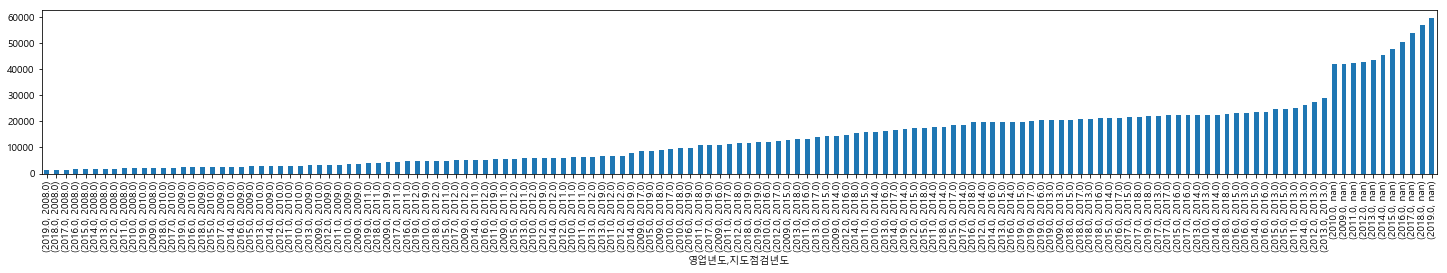

In [94]:
BSN_CHC_BSN_yearly_live.groupby('영업년도').지도점검년도.value_counts(dropna=False).sort_values().plot(kind ='bar', figsize =(25,3))

In [180]:
BSN.merge(CHC[CHC['지도점검년도'] == 2018][['영업_인허가_대장_번호','점검결과']].drop_duplicates('영업_인허가_대장_번호'), 
                                   on='영업_인허가_대장_번호',
                                   how='left')['점검결과'].value_counts(dropna=False)
BSN.merge(CHC[CHC['지도점검년도'] == 2018][['영업_인허가_대장_번호','점검결과']].drop_duplicates('영업_인허가_대장_번호'), 
                                   on='영업_인허가_대장_번호',
                                   how='left')['점검결과'].shape
BSN.merge(CHC[CHC['지도점검년도'] == 2018][['영업_인허가_대장_번호','점검결과']].drop_duplicates('영업_인허가_대장_번호'), 
                                   on='영업_인허가_대장_번호',
                                   how='left')['영업_인허가_대장_번호'].nunique()

NaN    196028
0.0     16052
1.0       749
Name: 점검결과, dtype: int64

(212829,)

212829

## 최master 코드 --> datetime을 모두 int로 conversion

In [186]:
BSN[BSN['폐업_일자'] < pd.to_datetime('2019-1-1')].merge(CHC[CHC['지도점검년도'] == pd.to_datetime('2018-1-1')][['영업_인허가_대장_번호','점검결과']].drop_duplicates('영업_인허가_대장_번호'), 
                                   on='영업_인허가_대장_번호',
                                   how='left').sort_values(by='점검결과', ascending=False).head(5)

,영업_인허가_대장_번호,영업소재지,위도,경도,허가_일자,폐업_일자,업종코드,단계,점검결과
0,2007001004223363,경상남도,NaN,NaN,20070528,2010-04-15,632,소비,NaN
1,2010001004248896,경기도,NaN,NaN,20100216,2013-06-28,632,소비,NaN
2,1998001004358539,전라남도,126.395260,34.795768,19980805,2018-08-29,632,소비,NaN
3,2016001000070198,경기도,127.100901,37.255922,20160216,2018-05-04,632,소비,NaN
4,2012001004311193,서울특별시,127.098367,37.487791,20121203,2018-02-27,632,소비,NaN


In [187]:
BSN.merge(CHC[['지도점검년도','영업_인허가_대장_번호']].drop_duplicates('영업_인허가_대장_번호'),
          on='영업_인허가_대장_번호',
          how='left')['지도점검년도'].value_counts(dropna=False)

NaN       150761
2013.0     14745
2014.0      7268
2015.0      6995
2016.0      6754
2017.0      5228
2018.0      4935
2011.0      4041
2012.0      3124
2009.0      2572
2019.0      2525
2008.0      2009
2010.0      1872
Name: 지도점검년도, dtype: int64

In [188]:
print(BSN[BSN['폐업_일자'] < pd.to_datetime('2020-1-1')].shape[0])
BSN[BSN['폐업_일자'] < pd.to_datetime('2020-1-1')].merge(CHC[['지도점검년도','영업_인허가_대장_번호']].drop_duplicates('영업_인허가_대장_번호'),
                                       on='영업_인허가_대장_번호',
                                       how='left')['지도점검년도'].value_counts(dropna=False)

108757


NaN       91177
2013.0     5067
2014.0     2364
2015.0     1868
2011.0     1812
2016.0     1424
2012.0     1178
2009.0     1002
2017.0      865
2008.0      801
2010.0      707
2018.0      419
2019.0       73
Name: 지도점검년도, dtype: int64

In [189]:
np.append(CHC['지도점검년도'].unique(), pd.to_datetime('2020-1-1'))

print(BSN[BSN['폐업_일자'] < pd.to_datetime('2020-1-1')].shape[0])
BSN.merge(CHC[['지도점검년도','영업_인허가_대장_번호']].drop_duplicates('영업_인허가_대장_번호'),
                                       on='영업_인허가_대장_번호',
                                       how='left')['지도점검년도'].value_counts(dropna=False)

np.append(CHC['지도점검년도'].unique(), pd.to_datetime('2020-1-1'))

array([2011.0, 2013.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2012.0,
       2014.0, 2010.0, 2008.0, 2009.0, Timestamp('2020-01-01 00:00:00')],
      dtype=object)

108757


NaN       150761
2013.0     14745
2014.0      7268
2015.0      6995
2016.0      6754
2017.0      5228
2018.0      4935
2011.0      4041
2012.0      3124
2009.0      2572
2019.0      2525
2008.0      2009
2010.0      1872
Name: 지도점검년도, dtype: int64

array([2011.0, 2013.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2012.0,
       2014.0, 2010.0, 2008.0, 2009.0, Timestamp('2020-01-01 00:00:00')],
      dtype=object)

In [194]:
# print(BSN[BSN['폐업_일자'] < 99999999].shape[0])
df_result = pd.DataFrame(columns=['index'])
list_unique = ['count']
for y in sorted(np.append(CHC['지도점검년도'].unique(), 9999)):
    chk_date = y*10000 + 9999
    df_temp = BSN[BSN['폐업_일자'] > chk_date].merge(CHC[['지도점검년도','영업_인허가_대장_번호']].drop_duplicates('영업_인허가_대장_번호'),
                                           on='영업_인허가_대장_번호',
                                           how='left')['지도점검년도'].value_counts(dropna=False)
    list_unique.append(BSN[BSN['폐업_일자'] > chk_date].shape[0])
    #print(df_temp.reset_index().rename(columns={'지도점검년도':f'{y}'}))
    df_result = df_result.merge(df_temp.reset_index().rename(columns={'지도점검년도':f'{y}'}), on='index', how='outer')
    
df_result['index'] = df_result['index'].astype(str)

TypeError: Invalid comparison between dtype=datetime64[ns] and float64

In [192]:
summary = df_result.append(pd.DataFrame(np.array(list_unique).reshape(1,14), columns=['index']+list(sorted(np.append(CHC['지도점검년도'].unique(), 9999).astype('str'))))).sort_values('index')
summary = summary.sort_values(by='index', ascending=False)
summary

,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,9999.0,index
0,150760,150760,150760,150760,150760,150760,150760,150760,150760,150760,150760,150760,150760.0,NaN,nan
0,212828,212828,212828,212828,212828,212828,212828,212828,212828,212828,212828,212828,NaN,212828,count
10,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525.0,NaN,2019.0
6,4935,4935,4935,4935,4935,4935,4935,4935,4935,4935,4935,4935,4935.0,NaN,2018.0
5,5228,5228,5228,5228,5228,5228,5228,5228,5228,5228,5228,5228,5228.0,NaN,2017.0
4,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754.0,NaN,2016.0
3,6995,6995,6995,6995,6995,6995,6995,6995,6995,6995,6995,6995,6995.0,NaN,2015.0
2,7268,7268,7268,7268,7268,7268,7268,7268,7268,7268,7268,7268,7268.0,NaN,2014.0
1,14745,14745,14745,14745,14745,14745,14745,14745,14745,14745,14745,14745,14745.0,NaN,2013.0
8,3124,3124,3124,3124,3124,3124,3124,3124,3124,3124,3124,3124,3124.0,NaN,2012.0


### (Question) 단계(가공, 유통, 판매)별 현황 조회
#### 각 년도/업종별 점검 미점검업체
#### 각 년도별 최초점검업체, 각 년도/업체/업종별 점검회수
#### 가공단계의 경우 생산실적 미보고 업체 방문 회수가 비대칭적으로 많다?

## My calculation

In [12]:
BSN.columns, BSN.shape, BSN.nunique()[0]

CHC.columns, CHC.shape, CHC.nunique()[0], print('업체당 점검비율', CHC.shape[0]/CHC.nunique())

(Index(['영업_인허가_대장_번호', '허가_일자', '폐업_일자', '업종코드'], dtype='object'),
 (212829, 4),
 212829)

업체당 점검비율 영업_인허가_대장_번호        2.992798
지도점검년도          15479.750000
점검결과            92878.500000
점검               7430.280000
위반              30959.500000
점검 (n-1)         8443.500000
위반 (n-1)        26536.714286
점검 (n-2)         8845.571429
위반 (n-2)        26536.714286
점검 (n-3)         9776.684211
위반 (n-3)        26536.714286
점검 (n-4)        10319.833333
위반 (n-4)        26536.714286
점검 (n-5)        10926.882353
위반 (n-5)        30959.500000
dtype: float64


(Index(['영업_인허가_대장_번호', '지도점검년도', '점검결과', '점검', '위반', '점검 (n-1)', '위반 (n-1)',
        '점검 (n-2)', '위반 (n-2)', '점검 (n-3)', '위반 (n-3)', '점검 (n-4)', '위반 (n-4)',
        '점검 (n-5)', '위반 (n-5)'],
       dtype='object'), (185757, 15), 62068, None)

In [13]:
close_date = 20160101

print(BSN[BSN.폐업_일자 < close_date].shape)
file = BSN[BSN.폐업_일자 < close_date].merge(CHC.drop_duplicates('영업_인허가_대장_번호'), on='영업_인허가_대장_번호', how='left')
print(file.shape)

file.groupby('업종코드').지도점검년도.sum()

print('전체 영업중인 업체수:', file.shape[0]), print('위생점검 지도 업체:', file.지도점검년도.value_counts().sum())
print('2018 단속율 :', file.지도점검년도.value_counts().sum()/ file.shape[0])
file.지도점검년도.value_counts()

(83718, 4)
(83718, 18)


업종코드
005       28136.0
006        8044.0
007       78477.0
008      120689.0
042       90674.0
604     1518739.0
611      102532.0
612     1311374.0
613       92486.0
630    11337193.0
631      177071.0
632      490743.0
634      132831.0
635      181123.0
Name: 지도점검년도, dtype: float64

전체 영업중인 업체수: 83718
위생점검 지도 업체: 7789


(None, None)

2018 단속율 : 0.0930385341264722


2013.0    2738
2011.0    1236
2014.0    1001
2012.0     726
2009.0     716
2008.0     604
2010.0     520
2015.0     248
Name: 지도점검년도, dtype: int64

In [14]:
close_date = [20190101, 20180101, 20170101, 20160101, 20150101, 20140101]
company = []
#pd.DataFrame(data, index=index, columns=columns)
for i in close_date : 
    print(i)
    company.append(BSN[BSN.폐업_일자 < i].merge(CHC.drop_duplicates('영업_인허가_대장_번호'),
                                                  on='영업_인허가_대장_번호', how='left'))
for i, j in enumerate(company)  :
    print(i)
    print('전체 영업중인 업체수:', company[i].shape[0])
    print('위생점검 지도 업체:', company[i].지도점검년도.value_counts().sum())
    print('__________단속율')
    print(company[i].지도점검년도.value_counts().sum()/ company[i].shape[0])
    print(company[i].지도점검년도.value_counts())
    print('*'*50)
    

20190101
20180101
20170101
20160101
20150101
20140101
0
전체 영업중인 업체수: 104704
위생점검 지도 업체: 15852
__________단속율
0.15139822738386308
2013.0    4716
2014.0    2191
2011.0    1733
2015.0    1662
2016.0    1193
2012.0    1119
2009.0     963
2008.0     770
2010.0     677
2017.0     626
2018.0     202
Name: 지도점검년도, dtype: int64
**************************************************
1
전체 영업중인 업체수: 97405
위생점검 지도 업체: 13046
__________단속율
0.1339356295878035
2013.0    4126
2014.0    1868
2011.0    1597
2015.0    1266
2012.0    1001
2009.0     894
2016.0     761
2008.0     717
2010.0     628
2017.0     188
Name: 지도점검년도, dtype: int64
**************************************************
2
전체 영업중인 업체수: 90760
위생점검 지도 업체: 10421
__________단속율
0.11481930365799912
2013.0    3506
2014.0    1483
2011.0    1418
2012.0     859
2009.0     815
2015.0     800
2008.0     667
2010.0     576
2016.0     297
Name: 지도점검년도, dtype: int64
**************************************************
3
전체 영업중인 업체수: 83718
위생점검 지도 업체: 7789
_____

### 다른 방법

In [15]:
CHC_unique = CHC[['영업_인허가_대장_번호', '지도점검년도', '점검결과']].drop_duplicates('영업_인허가_대장_번호').sort_values(by='영업_인허가_대장_번호', ascending=False)

CHC = CHC[['영업_인허가_대장_번호', '지도점검년도', '점검결과']].sort_values(by='영업_인허가_대장_번호', ascending=False)

print(BSN.shape, BSN.nunique())
print(CHC_unique.shape, CHC_unique.nunique())# 실적보고 인허가업체 중복 제거
print(CHC.shape, CHC.nunique())

ttl = BSN.merge(CHC_unique, on='영업_인허가_대장_번호', how='left')
print(ttl.shape)
ttl.nunique().head(1)

(212829, 4) 영업_인허가_대장_번호    212829
허가_일자            12785
폐업_일자             7086
업종코드                15
dtype: int64
(62068, 3) 영업_인허가_대장_번호    62068
지도점검년도             12
점검결과                2
dtype: int64
(185757, 3) 영업_인허가_대장_번호    62068
지도점검년도             12
점검결과                2
dtype: int64
(212829, 6)


영업_인허가_대장_번호    212829
dtype: int64

## 모든 인허가업소(TTL)에서 단속/비단속업체 포함
####  '지도점검년도'가 NaN이면 비단속, 년도가 있으면 단속을 한 업소임

In [16]:
ttl.head(10)
print('단속활동 비율', ttl['지도점검년도'].notnull().sum()/ (ttl['지도점검년도'].notnull().sum() + ttl['지도점검년도'].isnull().sum()) )

,영업_인허가_대장_번호,허가_일자,폐업_일자,업종코드,지도점검년도,점검결과
0,2007001004223363,20070528,20100415,632,NaN,NaN
1,2010001004248896,20100216,20130628,632,NaN,NaN
2,1998001004358539,19980805,20180829,632,2009.0,0.0
3,2016001000070198,20160216,20180504,632,NaN,NaN
4,1991001004335127,19910712,99999999,632,NaN,NaN
5,2012001004311193,20121203,20180227,632,NaN,NaN
6,2004001004280023,20040430,20190115,632,2013.0,0.0
7,2006001004249995,20061115,20091231,632,NaN,NaN
8,2006001004256502,20060330,20080125,632,NaN,NaN
9,2004001004307975,20040112,20050513,632,NaN,NaN


단속활동 비율 0.2916331890860738


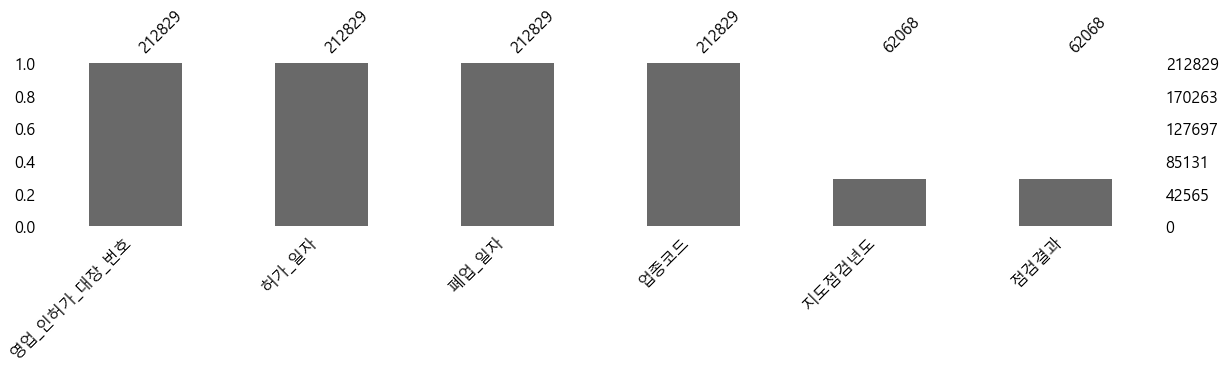

In [17]:
msno.bar(ttl, figsize=(20,3))

## 1.2.  2016년~2018년, 3년, 5년 동안 위생  점검 비점검업체 비율

위생점검 업체(업소 수) :  62068
평균 점검회수 :  1.0


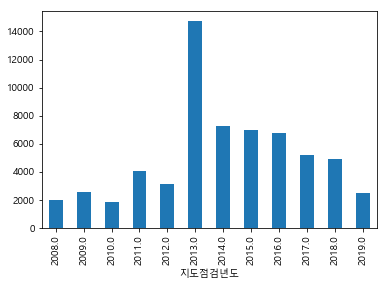

In [18]:
print('위생점검 업체(업소 수) : ', CHC_unique.영업_인허가_대장_번호.nunique())
print('평균 점검회수 : ', round(CHC_unique.shape[0]/len(CHC_unique['영업_인허가_대장_번호'].value_counts()),2))
CHC_unique.groupby(['영업_인허가_대장_번호','지도점검년도'])['점검결과'].agg('count').reset_index()['지도점검년도'].value_counts().sort_index().plot(kind='bar')
CHC_unique.groupby(['지도점검년도'])['영업_인허가_대장_번호'].count().plot(kind='bar') # 년간 지도점검 회수